# Exploratory data analysis

In [20]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Country statistics

In [2]:
country_stat = pd.read_csv('data/cleaned/Country_stat.csv')

In [3]:
country_stat

Unnamed: 0 Code                   Country  urban_population  \
0             2  AGO                    Angola            66.177   
1             6  ARE      United Arab Emirates            86.789   
2             7  ARG                 Argentina            91.991   
3            13  AUS                 Australia            86.124   
4            14  AUT                   Austria            58.515   
..          ...  ...                       ...               ...   
106         231  USA  United States of America            82.459   
107         243  YEM                     Yemen            37.273   
108         244  ZAF              South Africa            66.856   
109         245  ZMB                    Zambia            44.072   
110         246  ZWE                  Zimbabwe            32.210   

     corruption_perception_index  gdp_per_capita  land_boundaries  coastline  \
0                           26.0       8274.5430          5369.00     1600.0   
1                           71.0      68887.8400          1066.00     1318.0   
2                           45.0      26629.5530         11968.00     4989.0   
3                           77.0      56981.3950             0.00    25760.0   
4                           77.0      65312.0230          2524.00        0.0   
..                           ...             ...              ...        ...   
106                         69.0      69511.7660         12002.00    19924.0   
107                         15.0        623.4000          1601.00     1906.0   
108                         44.0      14370.2380          5244.00     2798.0   
109                         34.0       3591.5642          6043.15        0.0   
110                         24.0       3294.8062          3229.00        0.0   

     num_border_countries  hospital_beds_per_1000  unemployment  \
0                     4.0                    0.75        16.497   
1                     2.0                    1.87         2.331   
2                     5.0                    3.71         9.843   
3                     0.0                    3.84         5.159   
4                     8.0                    7.19         4.560   
..                    ...                     ...           ...   
106                   2.0                    2.75         3.669   
107                   2.0                    0.71        17.202   
108                   6.0                    2.30        28.468   
109                   8.0                    2.00         5.542   
110                   4.0                    2.00         7.373   

          political_regime  gini_index  population_density    poverty  \
0    electoral_autocracies    0.512640           25.969065  31.122005   
1       closed_autocracies    0.263990          132.045270   0.000000   
2    electoral_democracies    0.433141           16.433529   1.684649   
3      liberal_democracies    0.343326            3.312877   0.497094   
4      liberal_democracies    0.302104          107.620880   0.640639   
..                     ...         ...                 ...        ...   
106    liberal_democracies    0.415335           36.927360   0.999171   
107     closed_autocracies    0.367071           66.502680  19.802757   
108  electoral_democracies    0.630258           49.120743  20.492558   
109  electoral_autocracies    0.514831           24.904613  64.349754   
110  electoral_autocracies    0.502564           39.476223  39.754530   

     median_age  land_area_sqkm  
0        16.302       1246700.0  
1        30.834         71020.0  
2        30.763       2736690.0  
3        36.543       7692020.0  
4        42.433         82520.0  
..          ...             ...  
106      37.002       9147420.0  
107      18.017        527970.0  
108      26.873       1213090.0  
109      16.763        743390.0  
110      17.187        386850.0  

[111 rows x 17 columns]

In [5]:
country_stat.dtypes

Unnamed: 0                       int64
Code                            object
Country                         object
urban_population               float64
corruption_perception_index    float64
gdp_per_capita                 float64
land_boundaries                float64
coastline                      float64
num_border_countries           float64
hospital_beds_per_1000         float64
unemployment                   float64
political_regime                object
gini_index                     float64
population_density             float64
poverty                        float64
median_age                     float64
land_area_sqkm                 float64
dtype: object

In [6]:
# convert to categorical the political regime
country_stat['political_regime'] = country_stat['political_regime'].astype('category')

In [8]:
country_stat['urban_population'].dtype.name

'float64'

In [23]:
def create_univariate_graph(df, variable):
    plt.figure(figsize = (10, 6))
    plt.title(variable)
    if df[variable].dtype.name == 'category':
        print(f'Mode for {variable}')
        print(df[variable].mode())
        print('\nPercentages:')
        print(df[variable].value_counts(normalize = True) * 100)
        sns.countplot(data = df, x = variable)
    else:
        # Compute the summary statistics
        mean_val = df[variable].mean()
        min_val = df[variable].min()
        q1_val = df[variable].quantile(0.25)
        median_val = df[variable].median()
        q3_val = df[variable].quantile(0.75)
        max_val = df[variable].max()
        std_val = df[variable].std()
        skewness_val = stats.skew(df[variable])
        print(f'Summary Statistics for {variable}')
        print(f'Mean: {mean_val:.6f}')
        print(f'Min: {min_val:.6f}')
        print(f'25%: {q1_val:.6f}')
        print(f'Median_val: {median_val:.6f}')
        print(f'75%: {q3_val:.6f}')
        print(f'Max: {max_val:.6f}')
        print(f'Std: {std_val:.6f}')
        print(f'Skewness: {skewness_val:.6f}')
        sns.histplot(data = df, x = variable)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


### Univariate 

In [10]:
country_stat_numeric_var = [
    'urban_population',
    'corruption_perception_index',
    'gdp_per_capita',
    'land_boundaries',
    'coastline',
    'num_border_countries',
    'hospital_beds_per_1000',
    'unemployment',
    'gini_index',
    'population_density',
    'poverty',
    'median_age',
    'land_area_sqkm'
]

country_stat_cat_var = [
    'political_regime'
]

Mode for political_regime
0    electoral_democracies
Name: political_regime, dtype: category
Categories (4, object): ['closed_autocracies', 'electoral_autocracies', 'electoral_democracies', 'liberal_democracies']

Percentages:
political_regime
electoral_democracies    33.333333
electoral_autocracies    30.630631
liberal_democracies      28.828829
closed_autocracies        7.207207
Name: proportion, dtype: float64


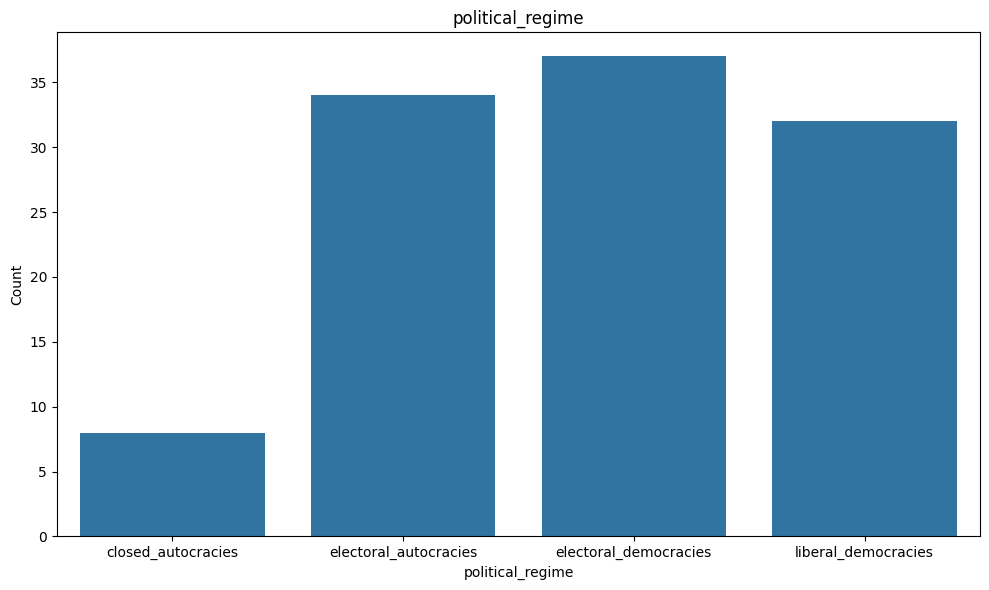

In [24]:
for var in country_stat_cat_var:
    create_univariate_graph(country_stat, var)

Summary Statistics for urban_population
Mean: 62.431712
Min: 13.250000
25%: 47.757000
Median_val: 65.764000
75%: 80.504500
Max: 99.188000
Std: 21.388623
Skewness: -0.354703


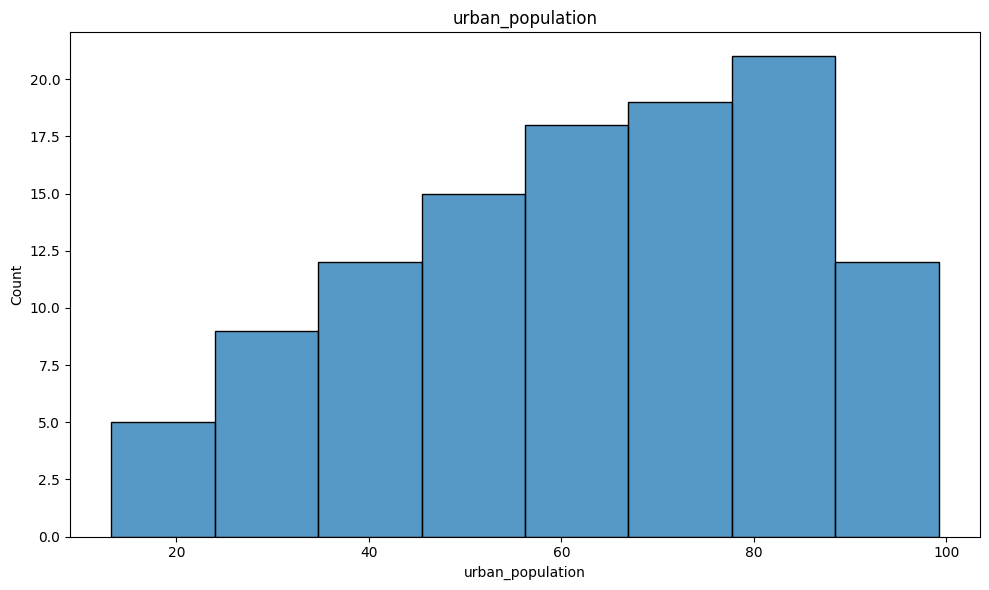

Summary Statistics for corruption_perception_index
Mean: 46.495495
Min: 15.000000
25%: 31.000000
Median_val: 41.000000
75%: 60.000000
Max: 87.000000
Std: 18.660544
Skewness: 0.583810


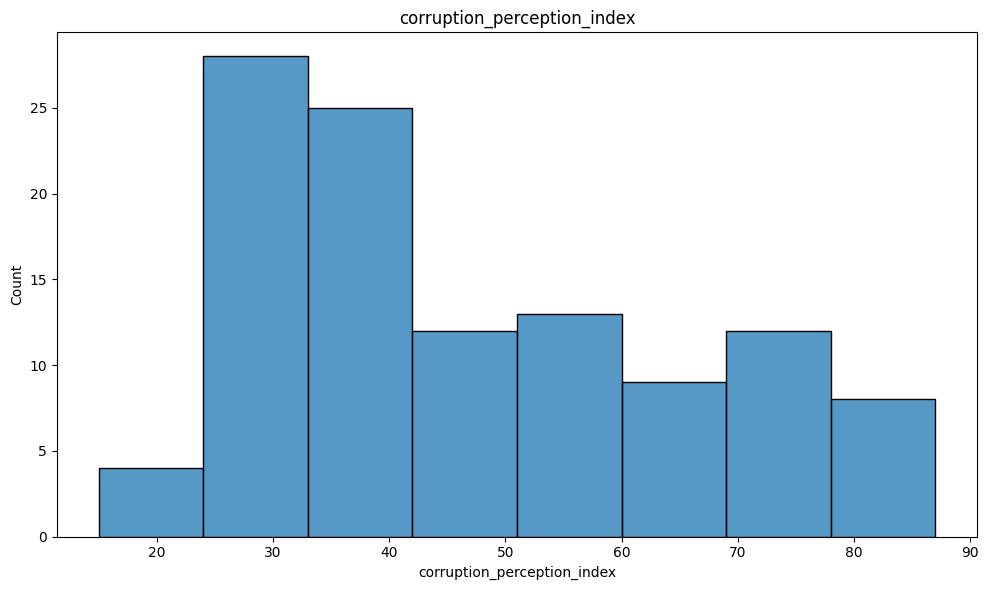

Summary Statistics for gdp_per_capita
Mean: 27560.969580
Min: 623.400000
25%: 7384.208650
Median_val: 18106.018000
75%: 41918.002500
Max: 134105.640000
Std: 25687.106608
Skewness: 1.469348


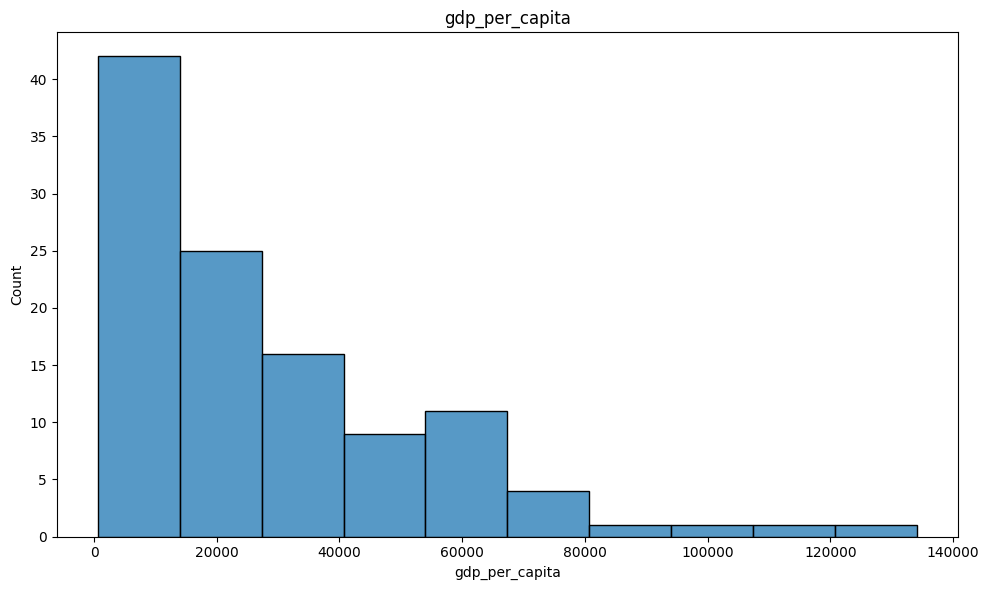

Summary Statistics for land_boundaries
Mean: 3383.638739
Min: 0.000000
25%: 1160.500000
Median_val: 2420.000000
75%: 4401.000000
Max: 22407.000000
Std: 3591.457730
Skewness: 2.417228


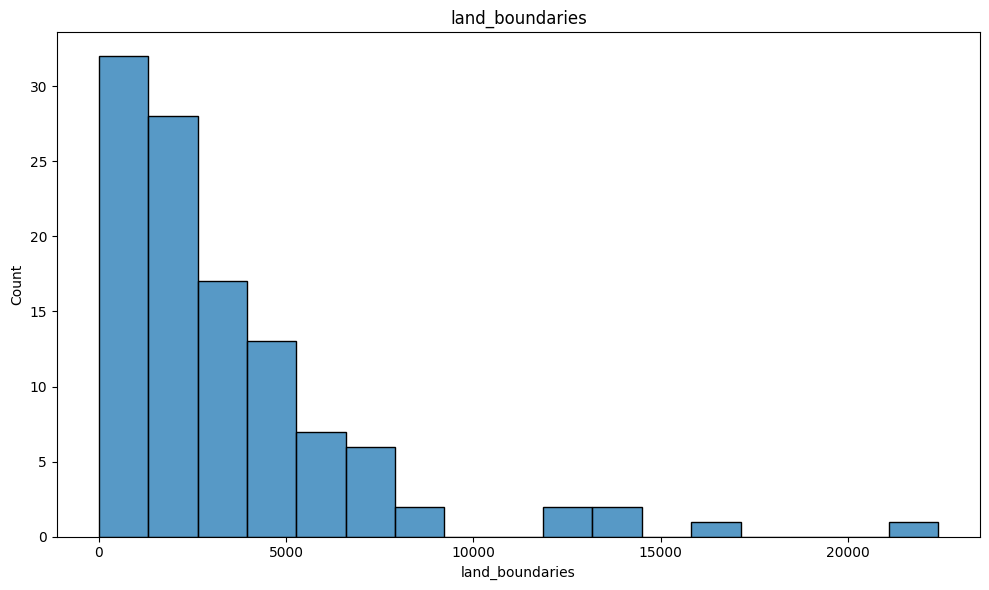

Summary Statistics for coastline
Mean: 5477.377477
Min: 0.000000
25%: 51.300000
Median_val: 823.000000
75%: 2790.000000
Max: 202080.000000
Std: 20628.615672
Skewness: 8.119991


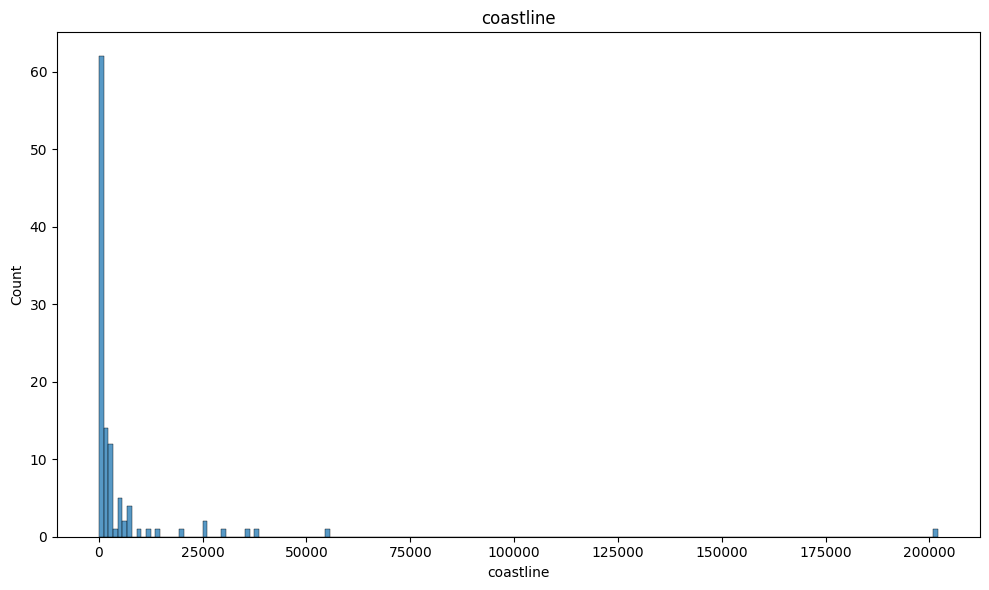

Summary Statistics for num_border_countries
Mean: 3.819820
Min: 0.000000
25%: 2.000000
Median_val: 4.000000
75%: 5.000000
Max: 14.000000
Std: 2.412838
Skewness: 0.828769


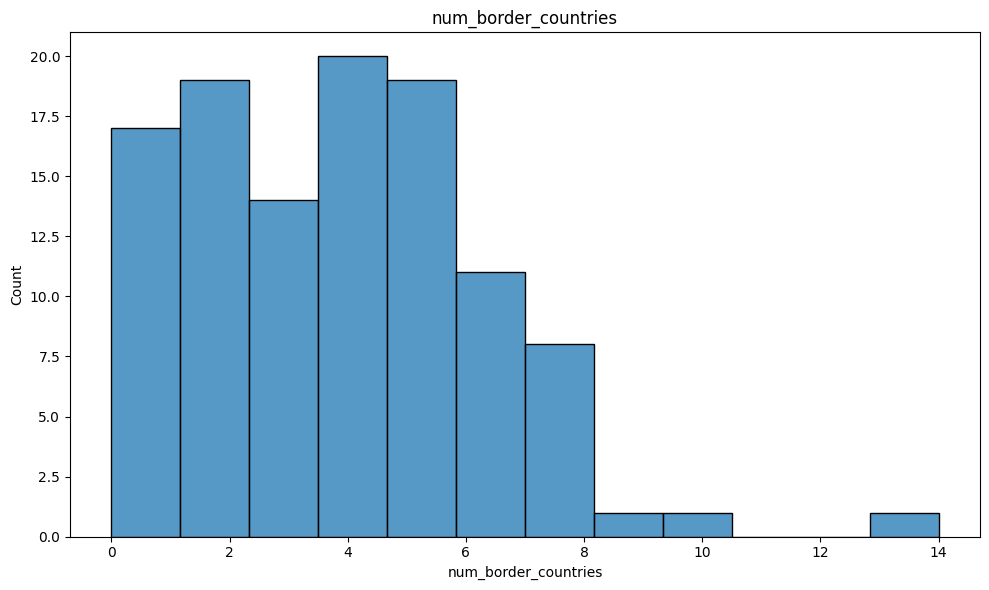

Summary Statistics for hospital_beds_per_1000
Mean: 3.053423
Min: 0.170000
25%: 1.075000
Median_val: 2.300000
75%: 4.365000
Max: 12.880000
Std: 2.542364
Skewness: 1.380665


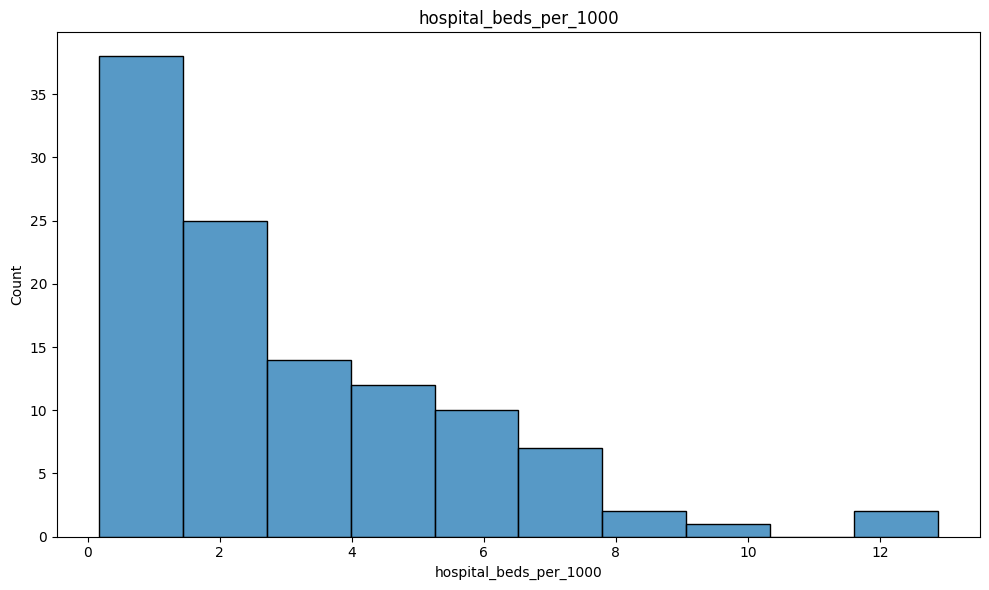

Summary Statistics for unemployment
Mean: 6.716081
Min: 0.100000
25%: 3.601500
Median_val: 5.014000
75%: 8.625500
Max: 28.468000
Std: 4.968859
Skewness: 1.630609


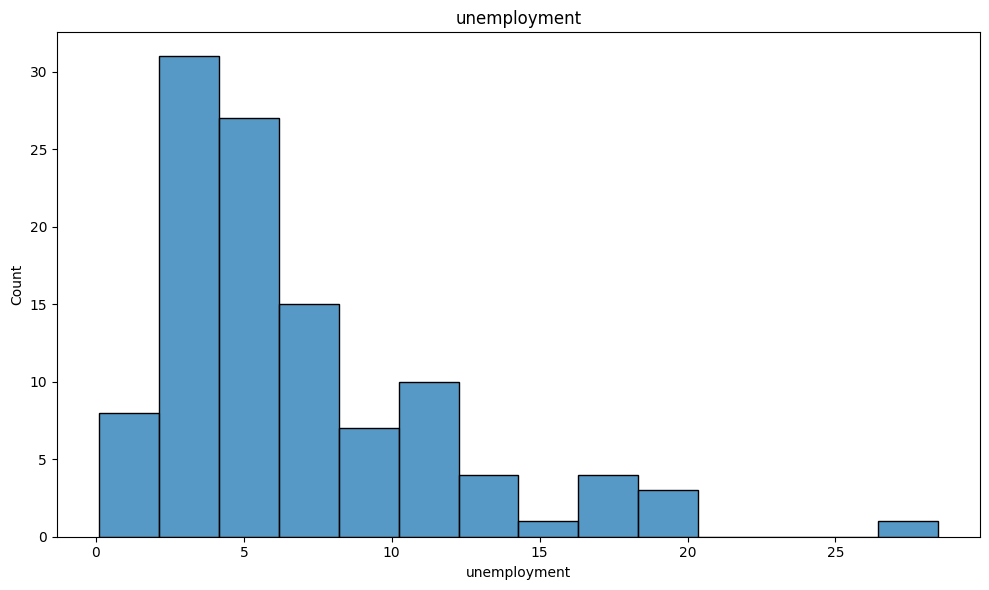

Summary Statistics for gini_index
Mean: 0.373198
Min: 0.232323
25%: 0.317653
Median_val: 0.353599
75%: 0.420466
Max: 0.630258
Std: 0.080628
Skewness: 0.821109


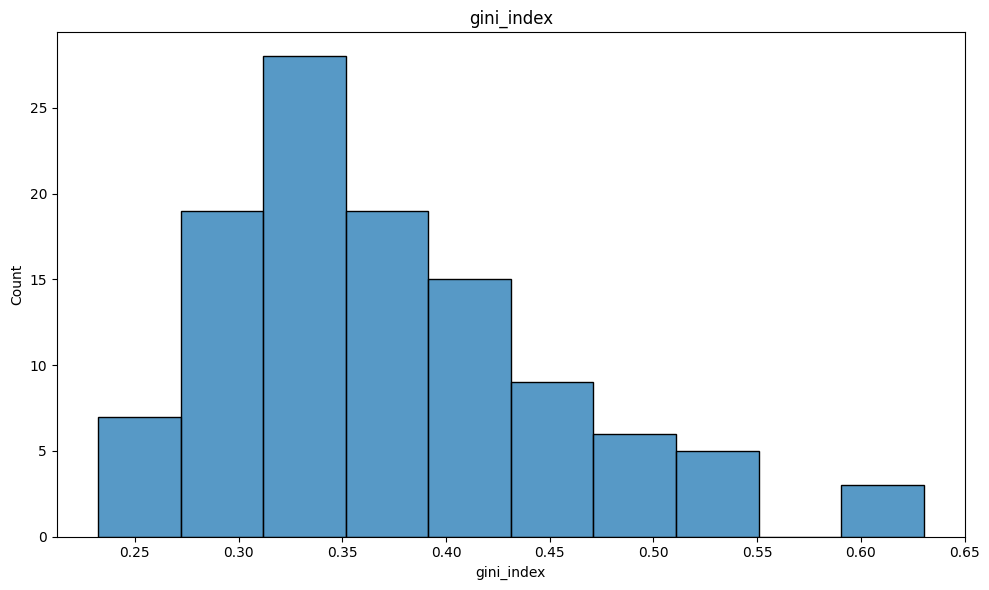

Summary Statistics for population_density
Mean: 159.322460
Min: 2.075187
25%: 37.464910
Median_val: 88.657280
75%: 178.912280
Max: 1575.053100
Std: 226.228316
Skewness: 3.659055


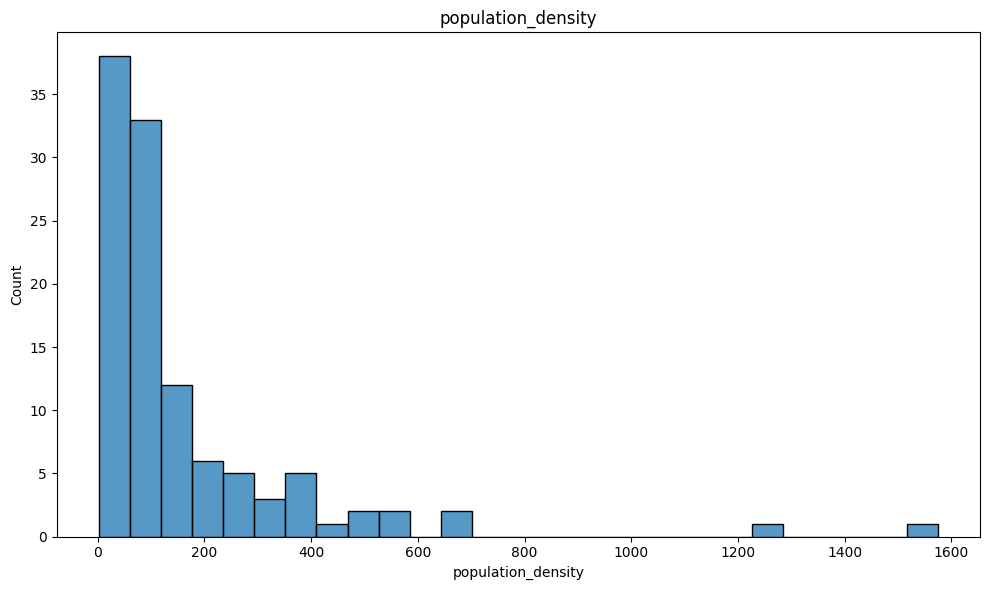

Summary Statistics for poverty
Mean: 8.707862
Min: 0.000000
25%: 0.237108
Median_val: 1.011511
75%: 6.626446
Max: 74.528350
Std: 15.953686
Skewness: 2.302863


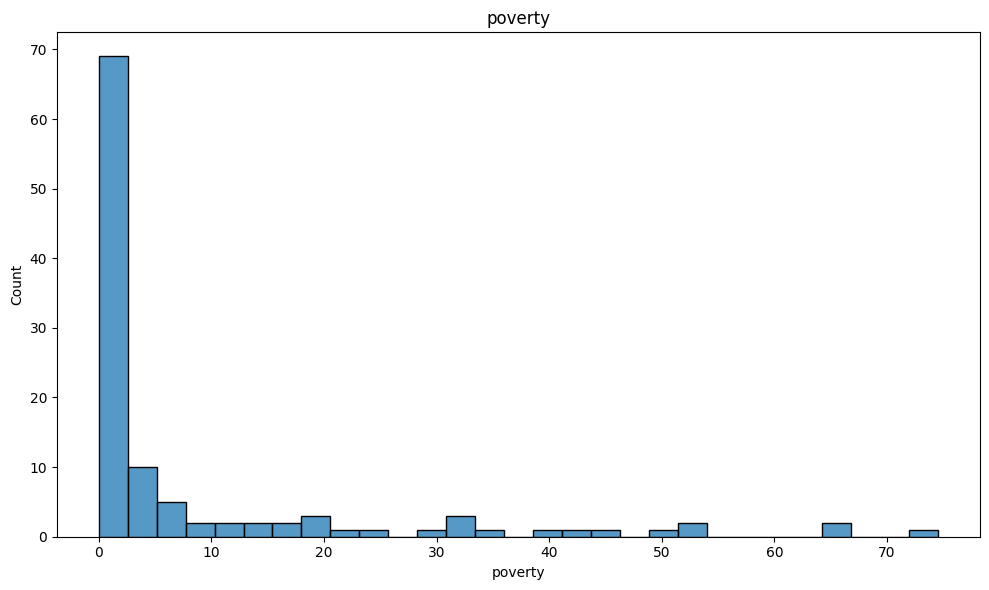

Summary Statistics for median_age
Mean: 30.556649
Min: 14.699000
25%: 22.376000
Median_val: 29.063000
75%: 39.765000
Max: 47.262000
Std: 9.542591
Skewness: -0.002014


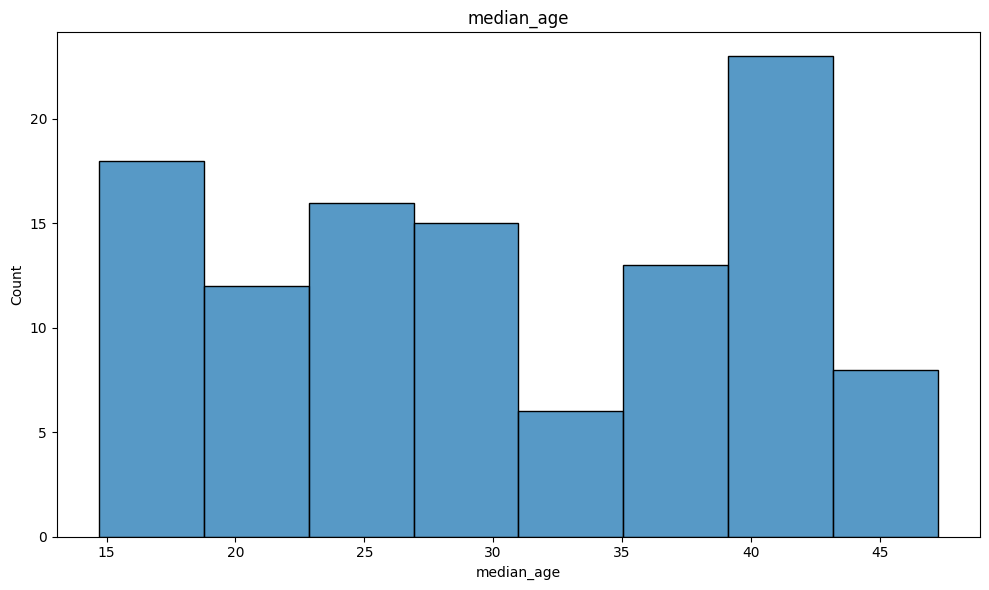

Summary Statistics for land_area_sqkm
Mean: 864301.536667
Min: 320.000000
25%: 65747.000000
Median_val: 230800.000000
75%: 616035.000000
Max: 16376870.000000
Std: 2196243.085068
Skewness: 4.769262


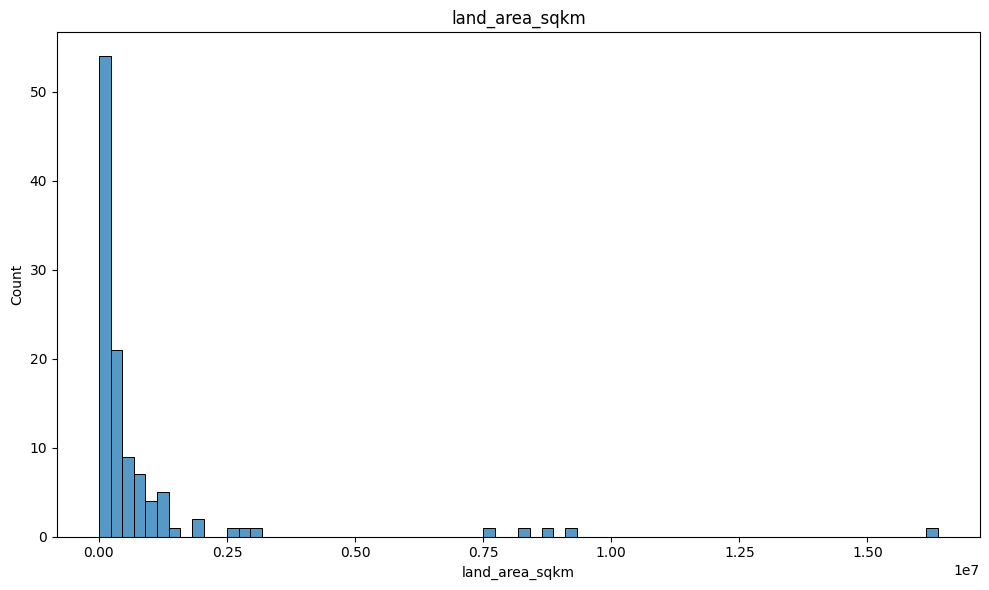

In [25]:
for var in country_stat_numeric_var:
    create_univariate_graph(country_stat, var)

### Bivariate analysis

#### Categorical vs Numeric

In [40]:
def create_bivariate_graph(df, x_var, y_var):
    if df[x_var].dtype.name == 'category':
        sns.boxplot(data = df, x = x_var, y = y_var, showfliers = False)
        plt.xticks(rotation = 45)
    else:
        sns.scatterplot(data = df, x = x_var, y = y_var, alpha = 0.7)
        sns.regplot(data = df, x = x_var, y = y_var, scatter = False,
                    color = 'red', line_kws = {'linewidth': 1})
        corr_coef, p_value = stats.pearsonr(df[x_var], df[y_var])
        plt.text(0.05, 0.95,
                 f'Pearson r = {corr_coef:.3f}\n{p_value:.3f}',
                 transform = plt.gca().transAxes,
                 verticalalignment = 'top',
                 bbox = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.8))
    plt.title(f'{y_var} vs {x_var}')
    plt.tight_layout()
    plt.show()

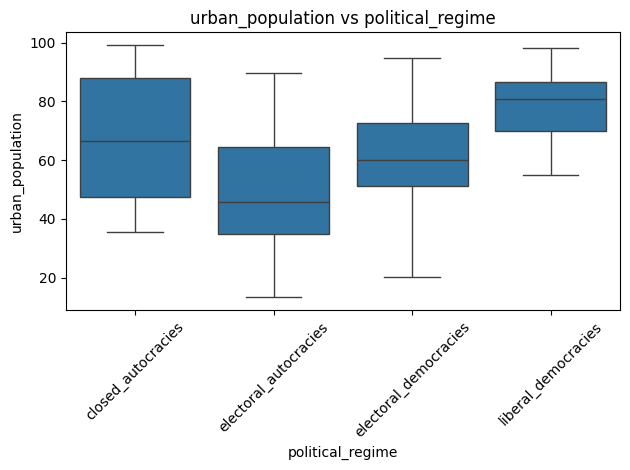

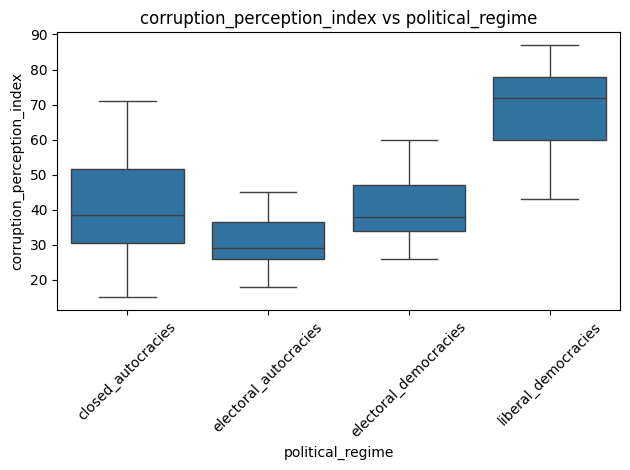

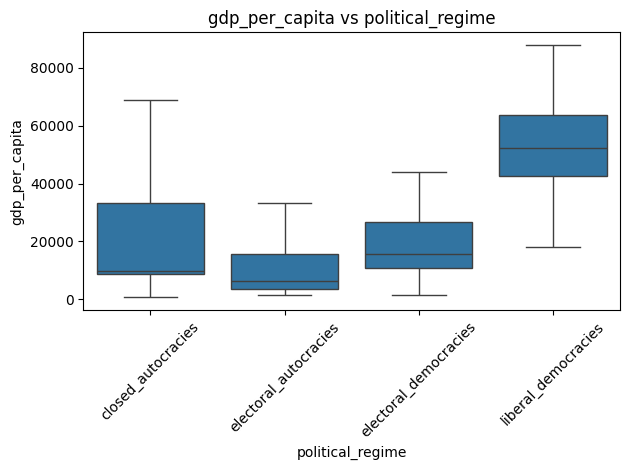

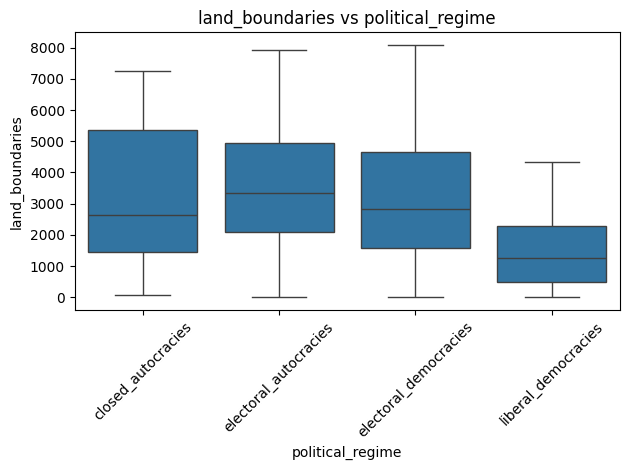

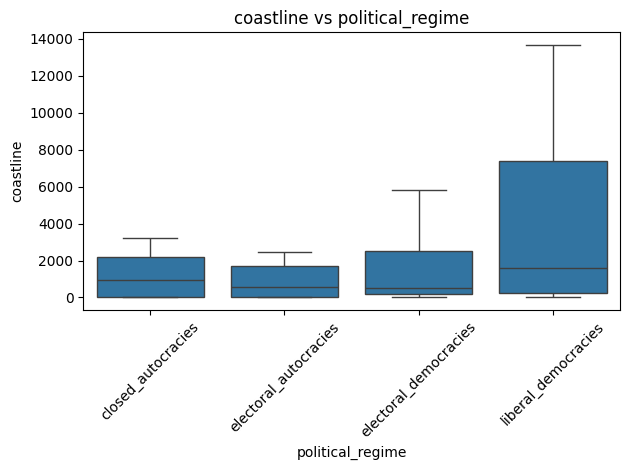

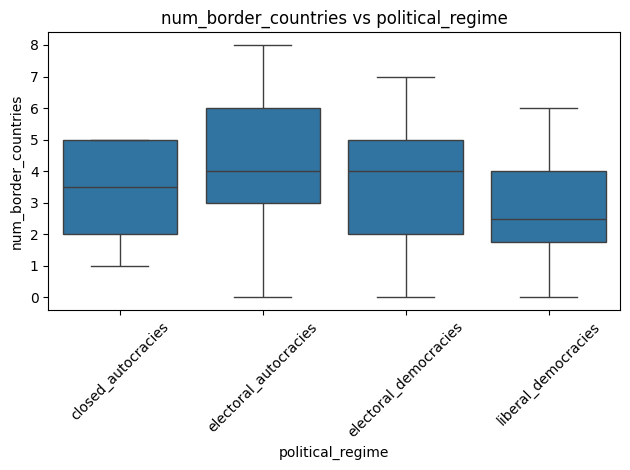

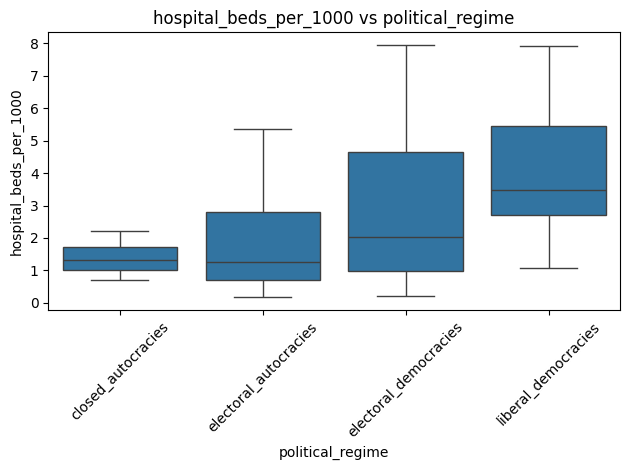

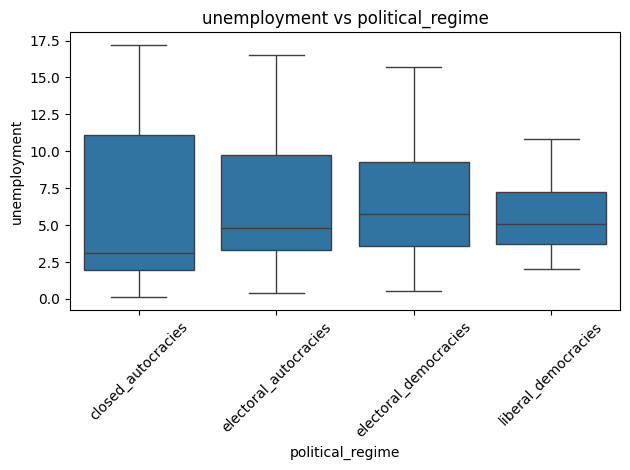

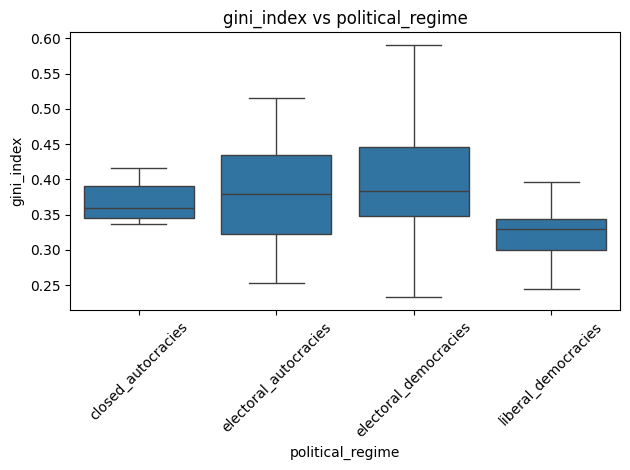

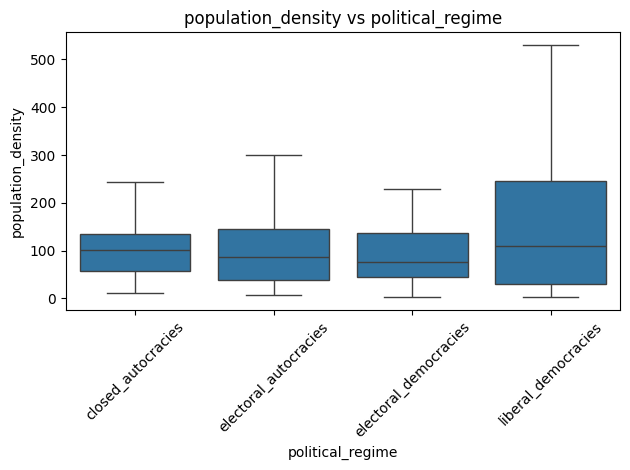

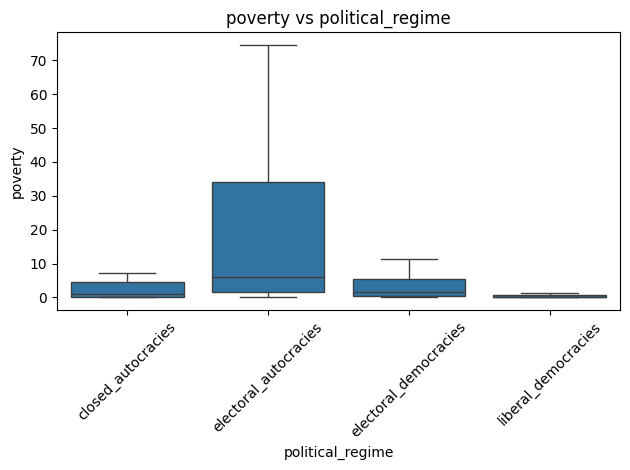

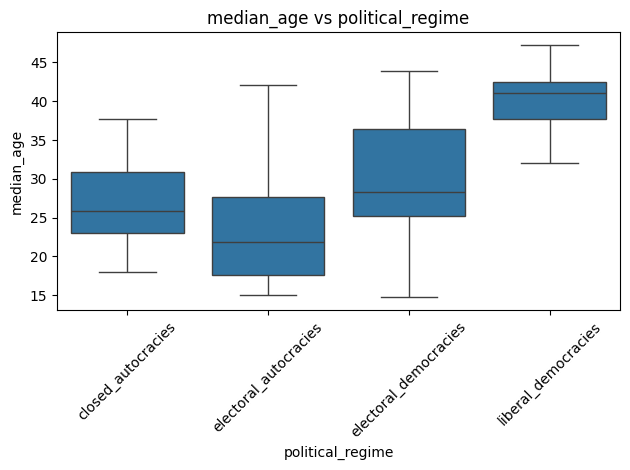

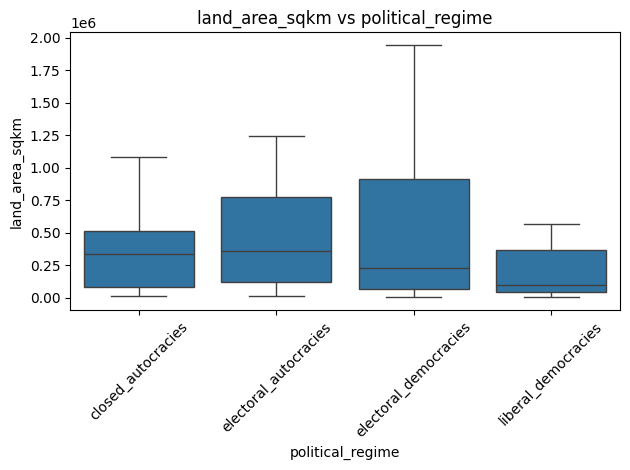

In [35]:
for x_var in country_stat_cat_var:
    for y_var in country_stat_numeric_var:
        create_bivariate_graph(country_stat, x_var, y_var)

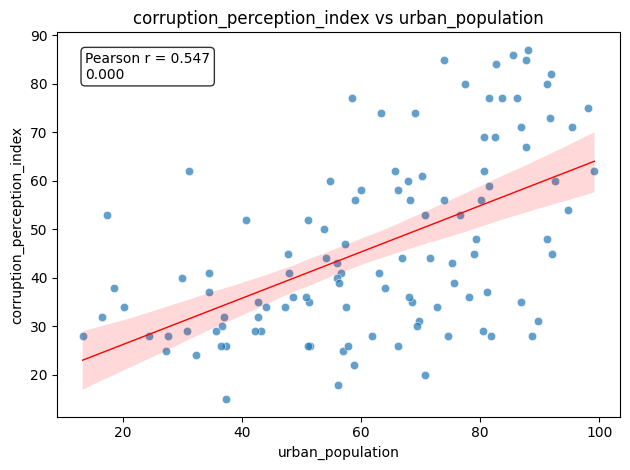

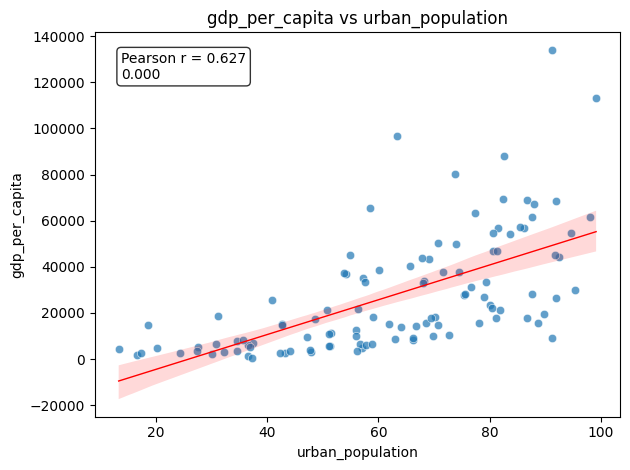

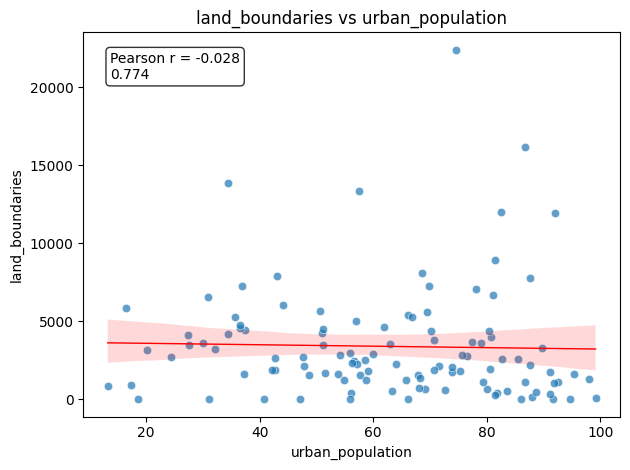

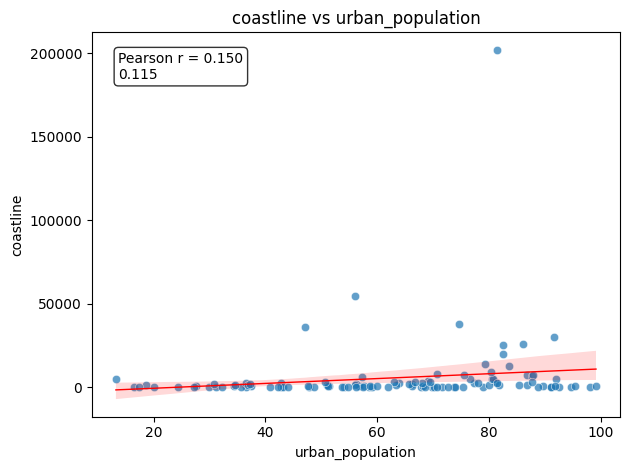

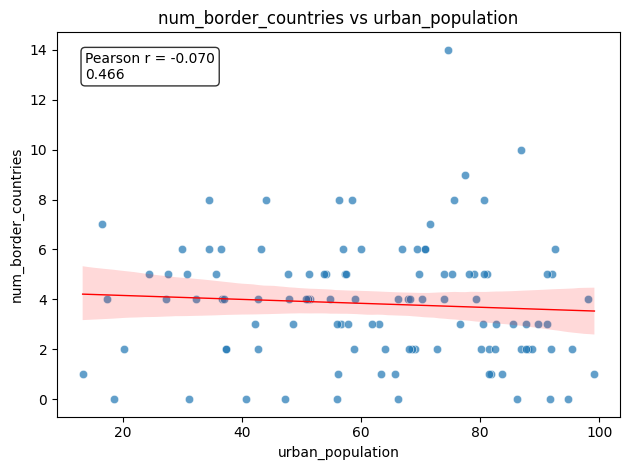

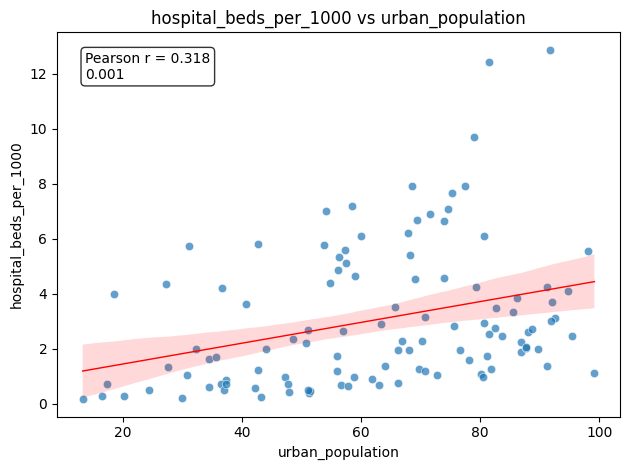

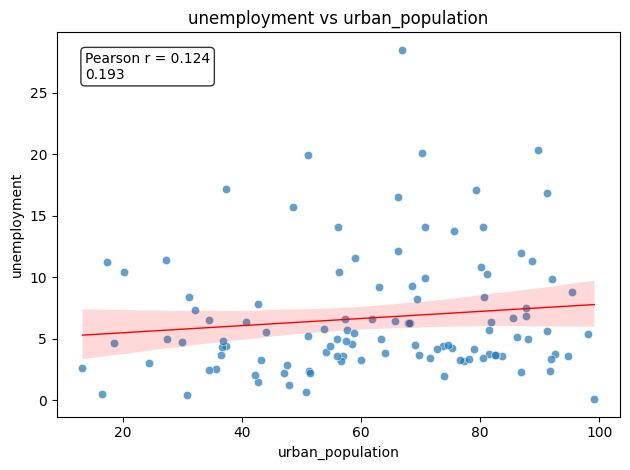

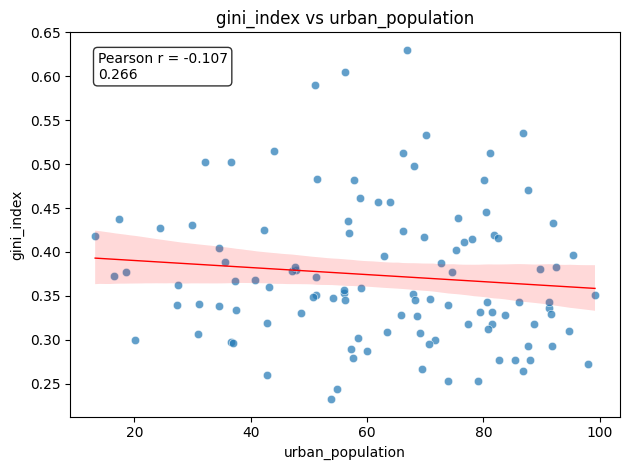

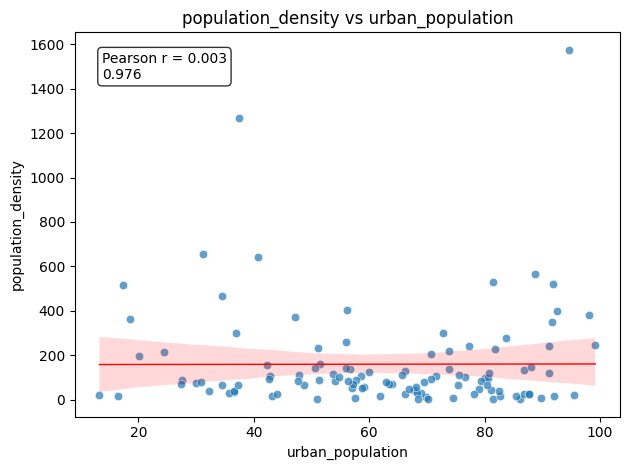

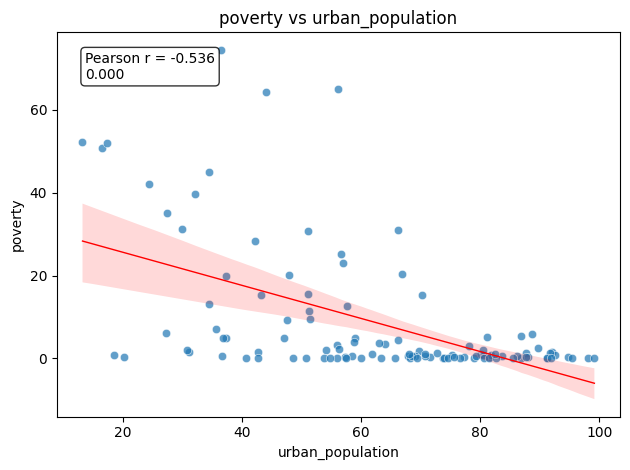

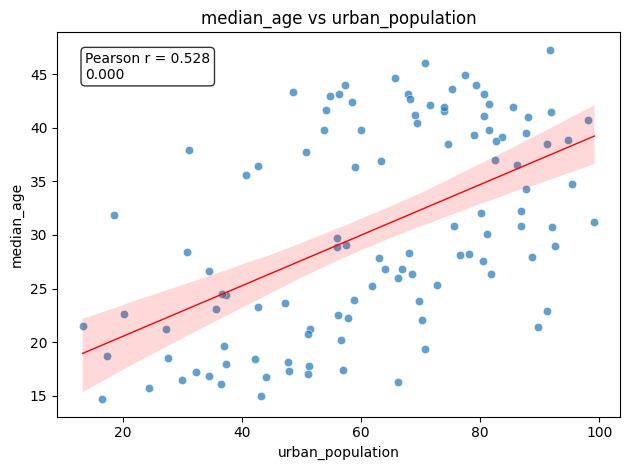

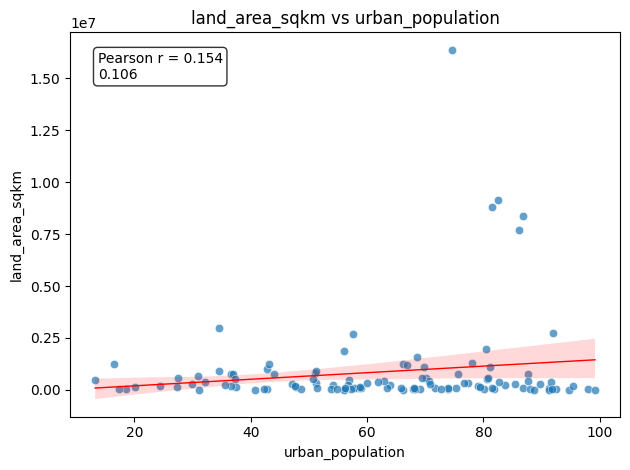

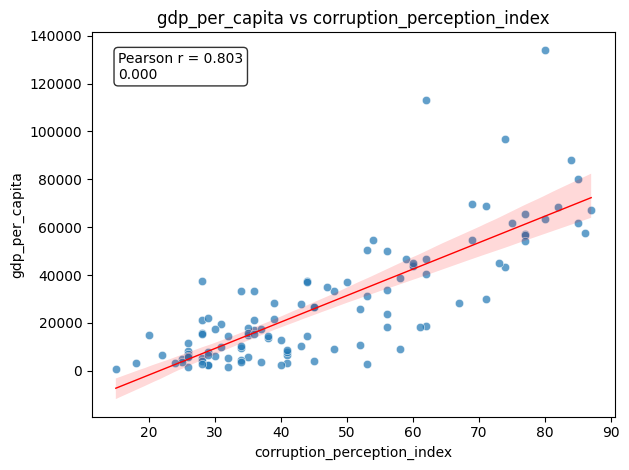

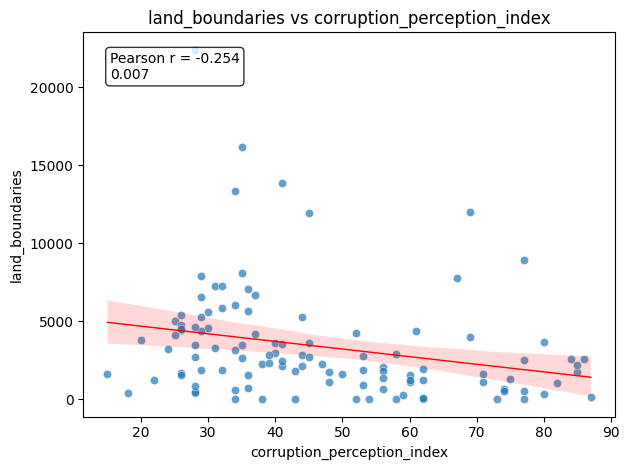

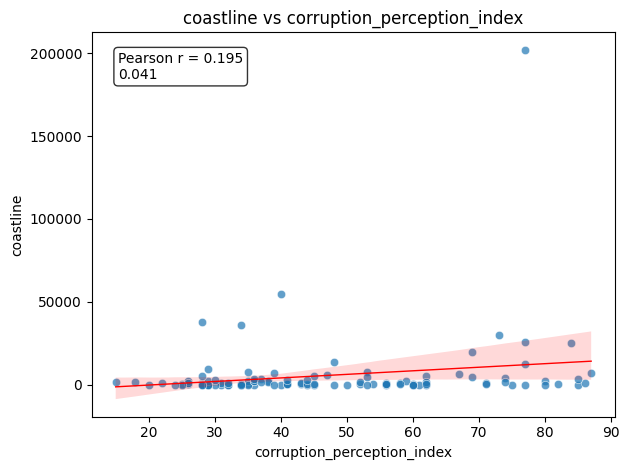

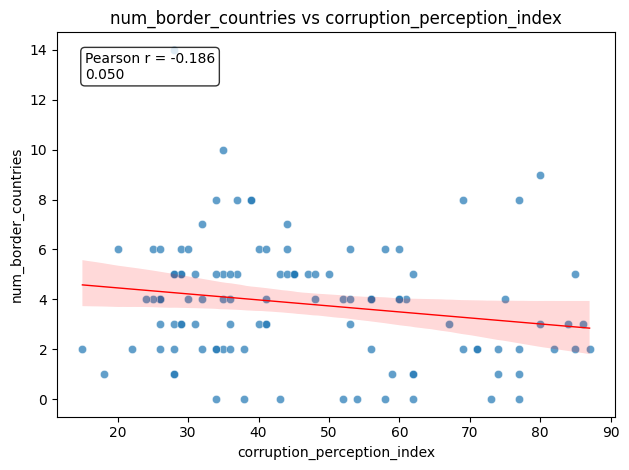

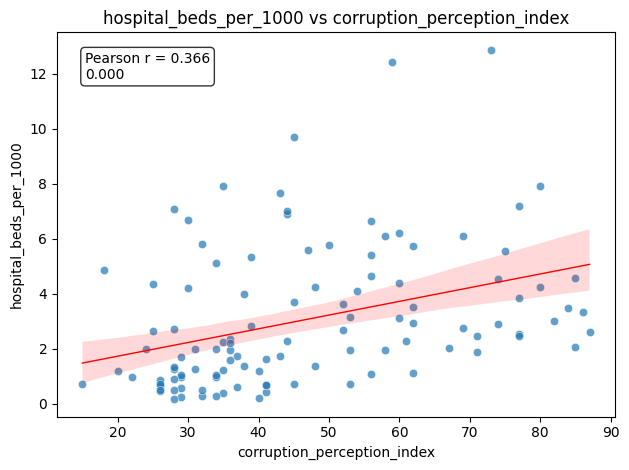

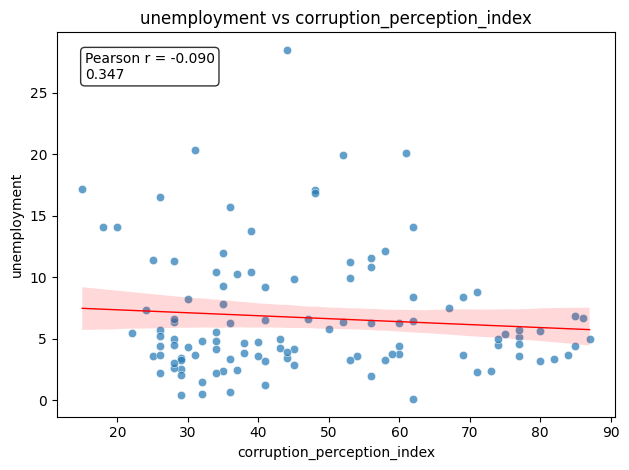

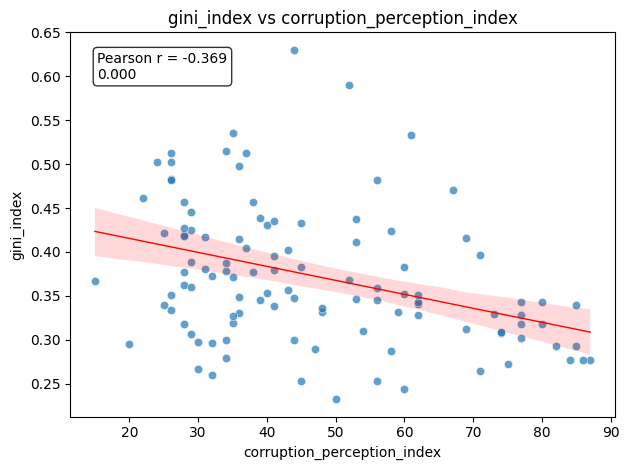

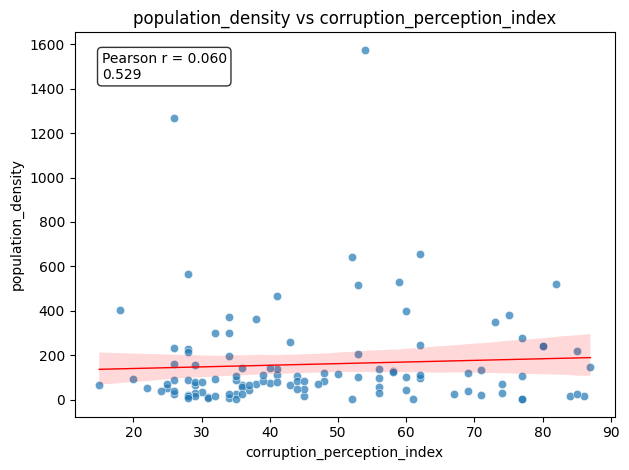

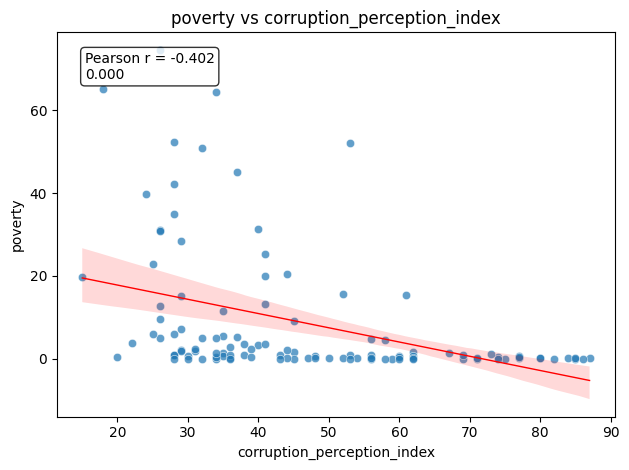

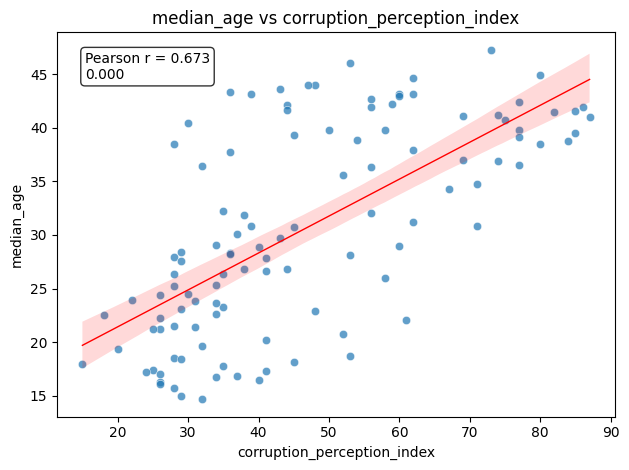

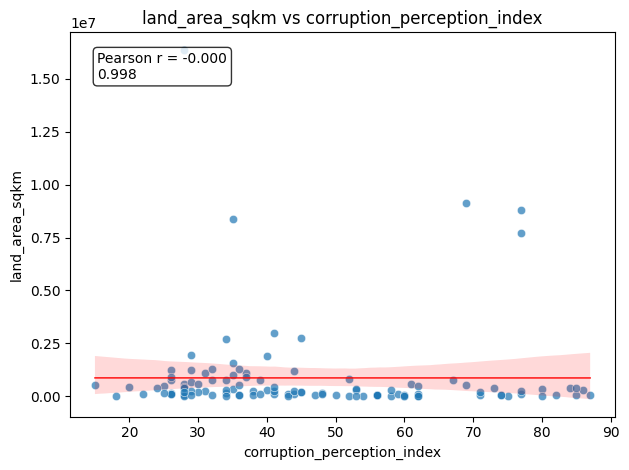

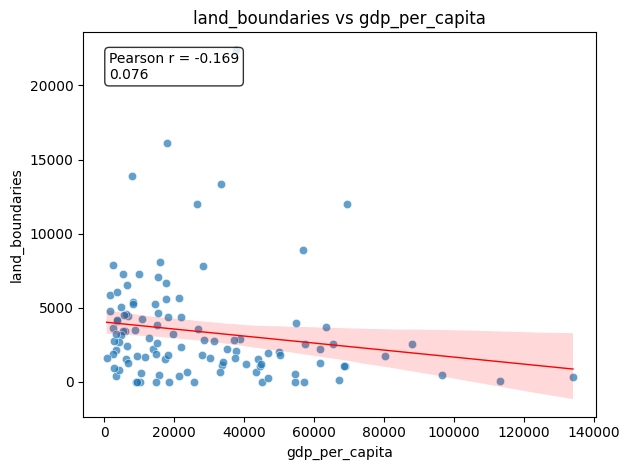

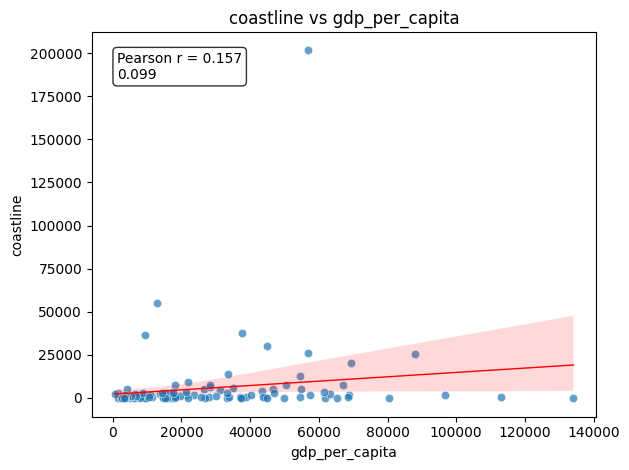

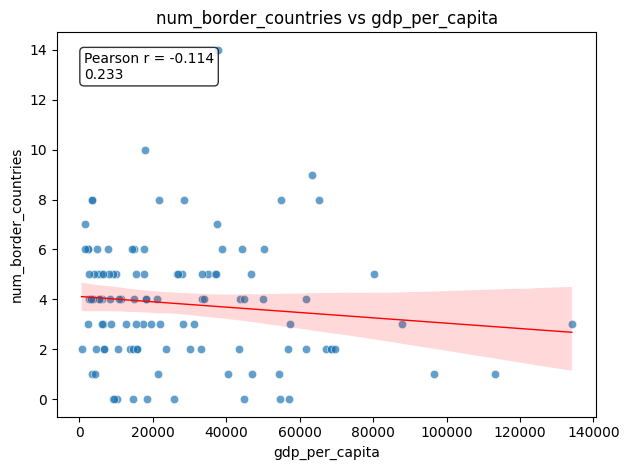

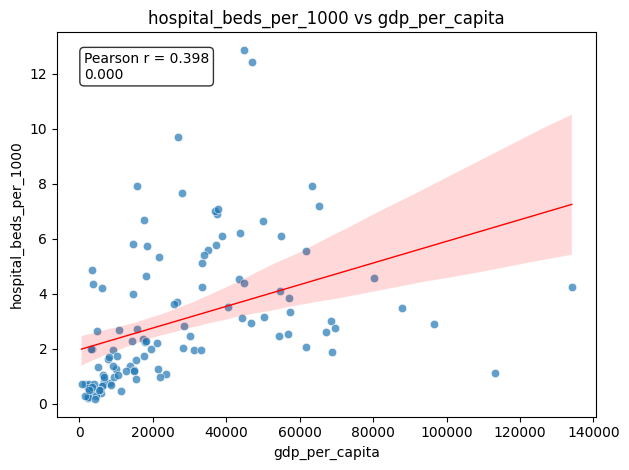

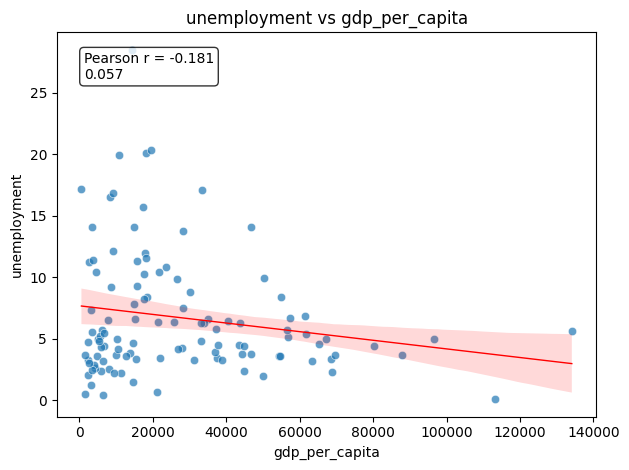

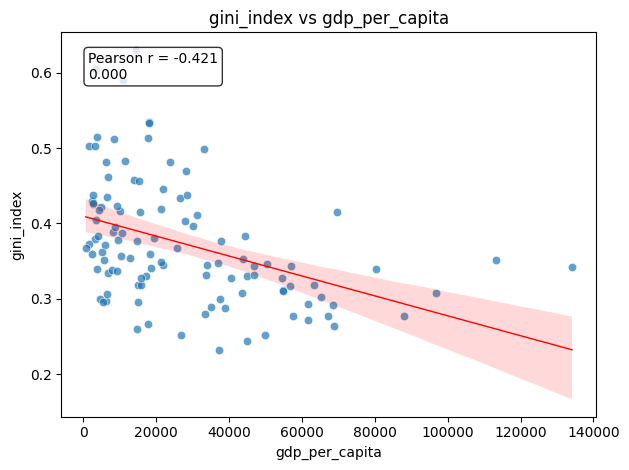

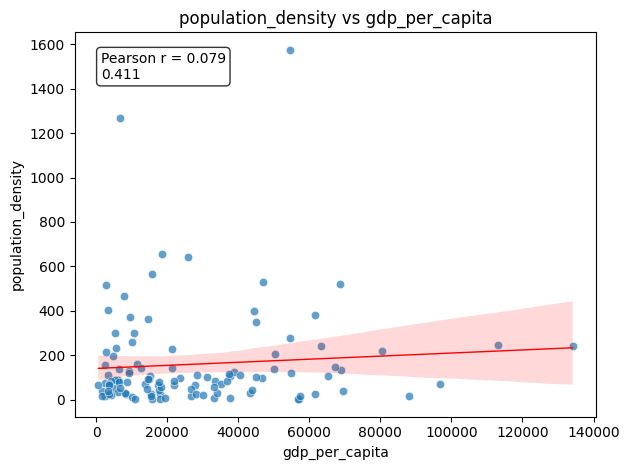

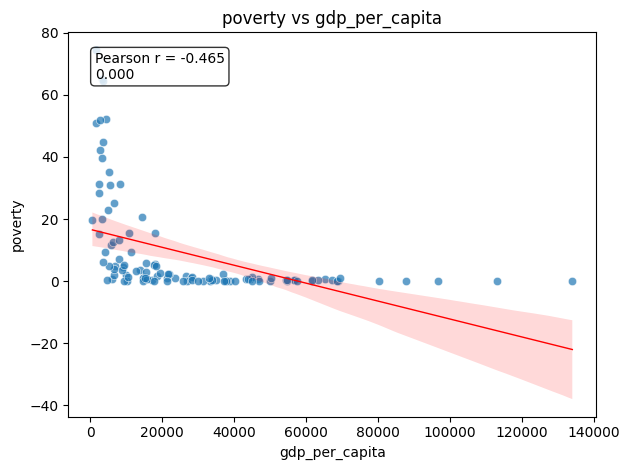

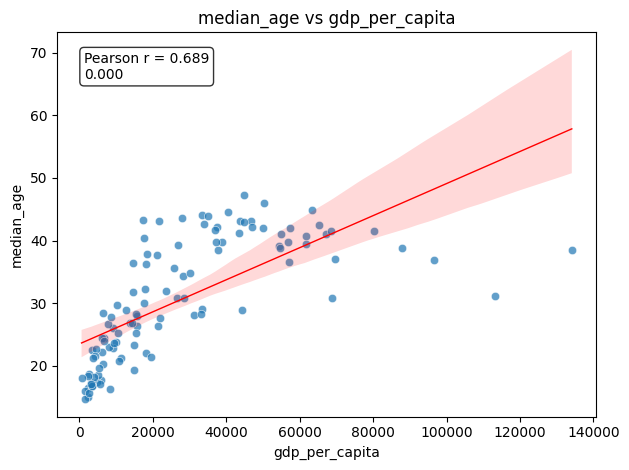

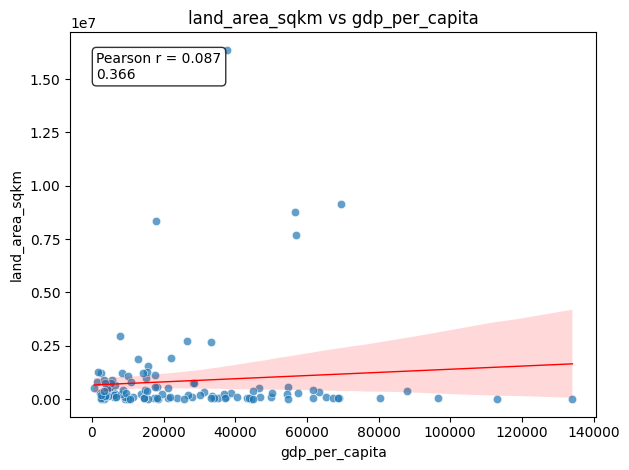

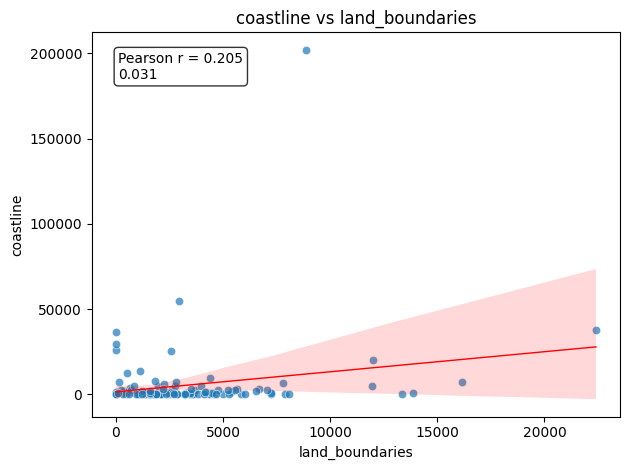

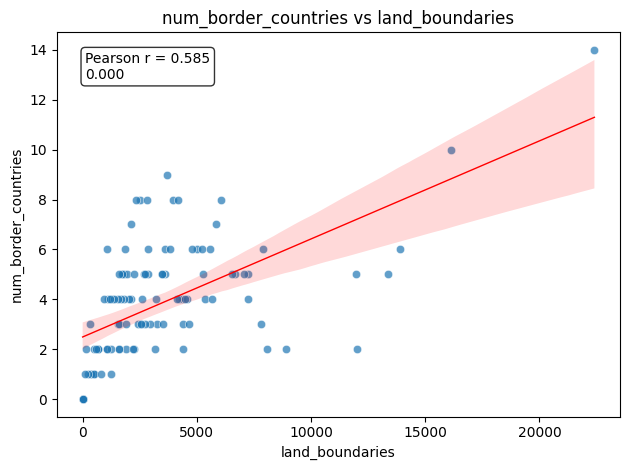

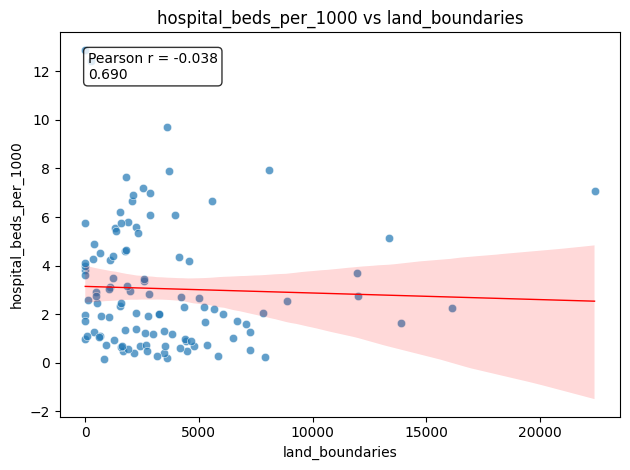

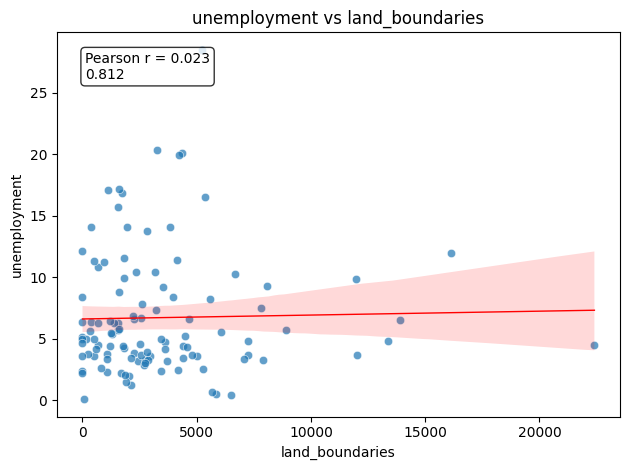

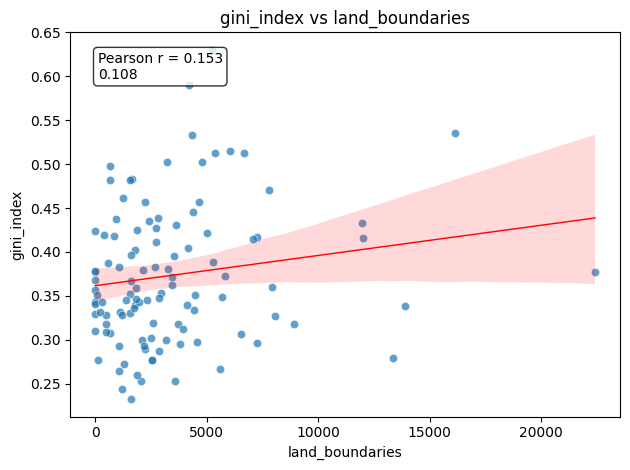

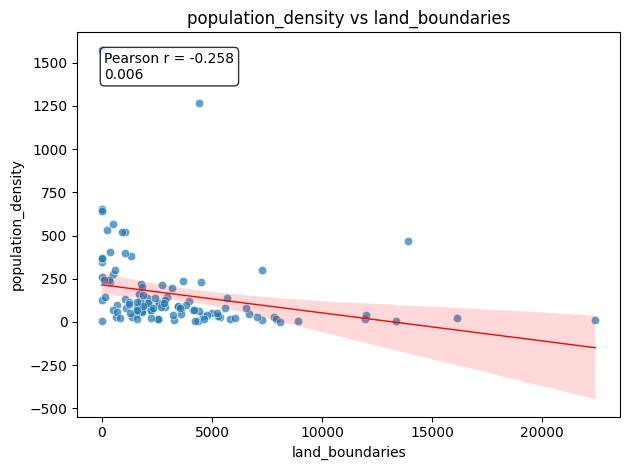

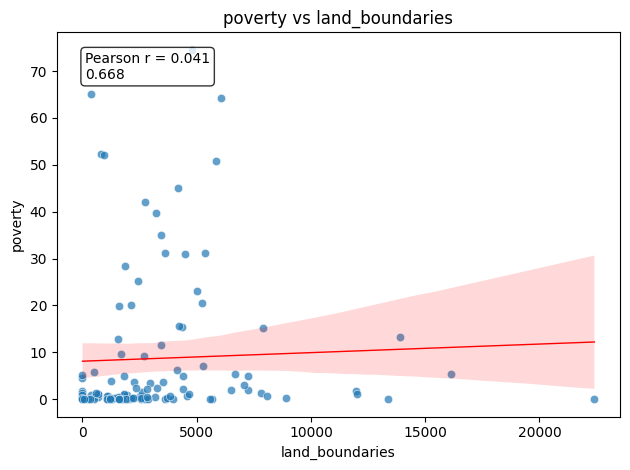

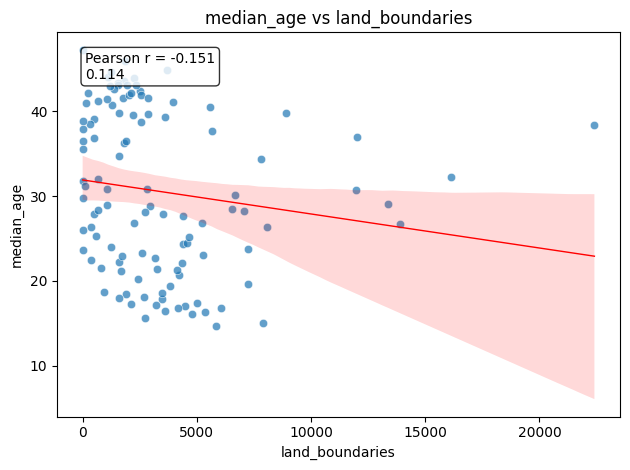

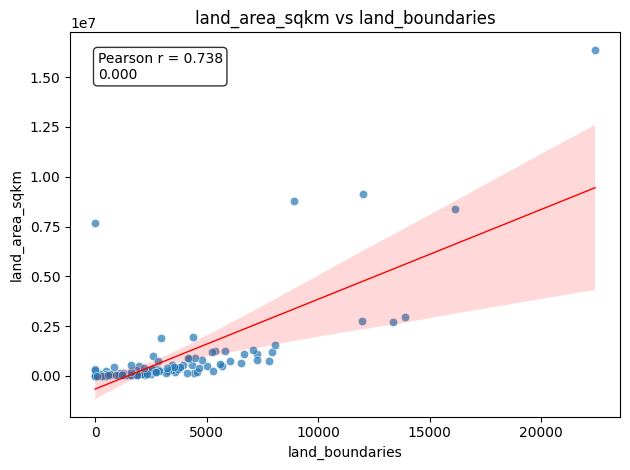

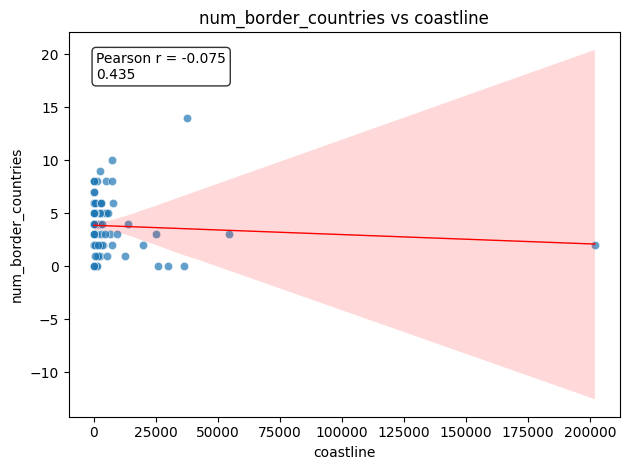

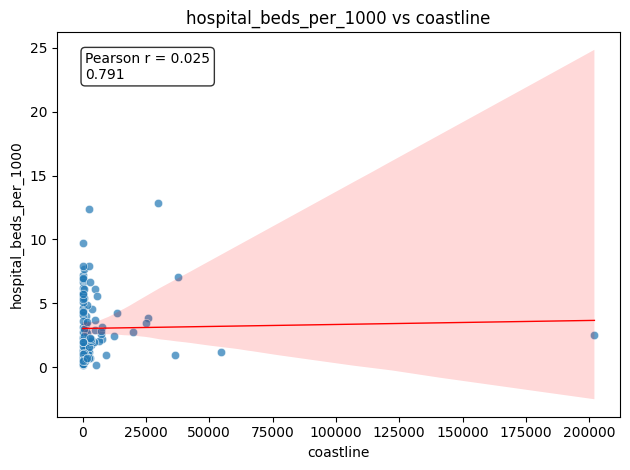

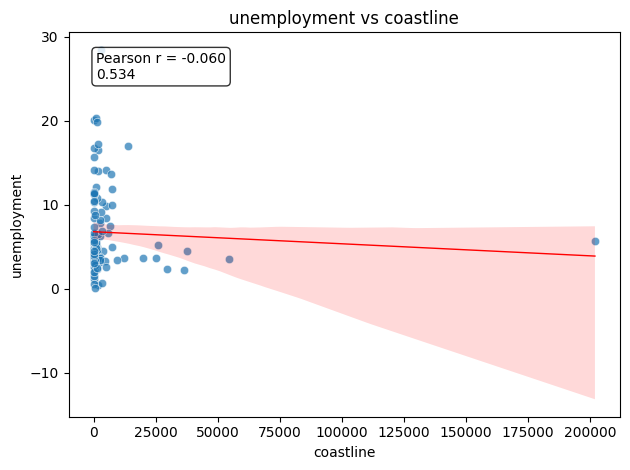

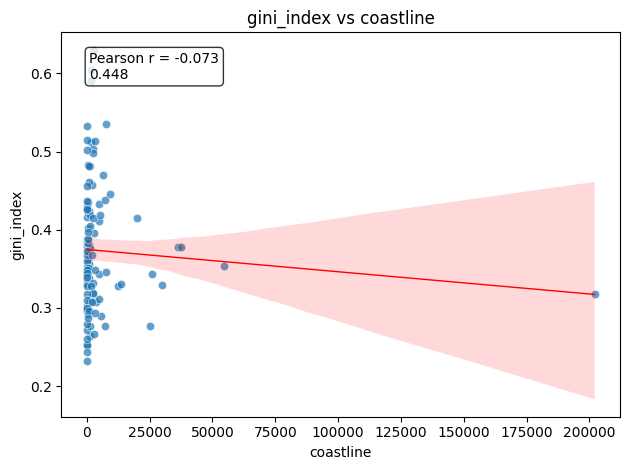

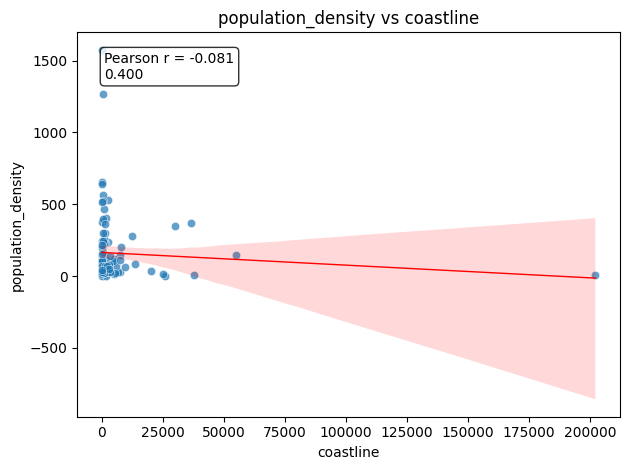

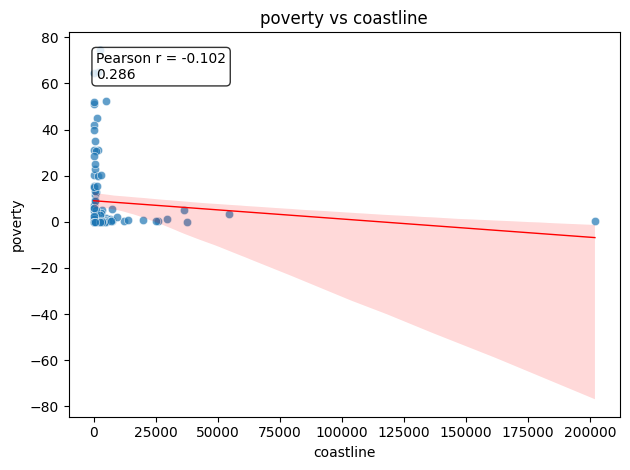

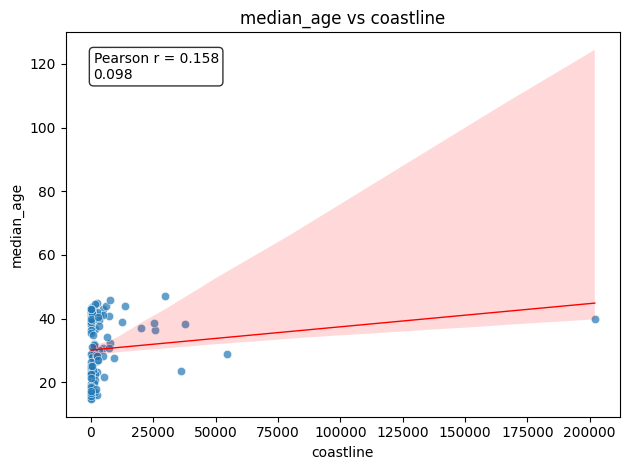

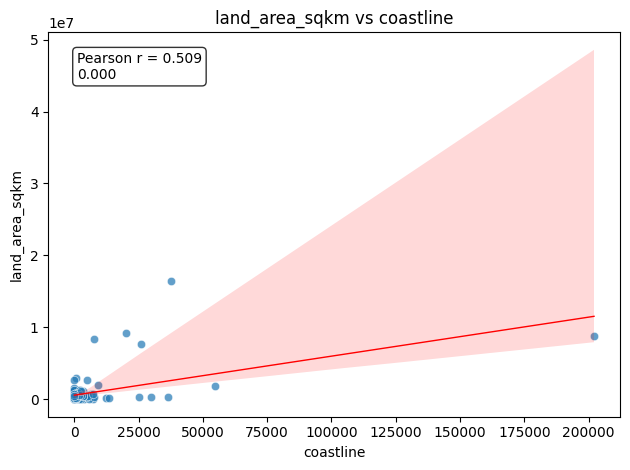

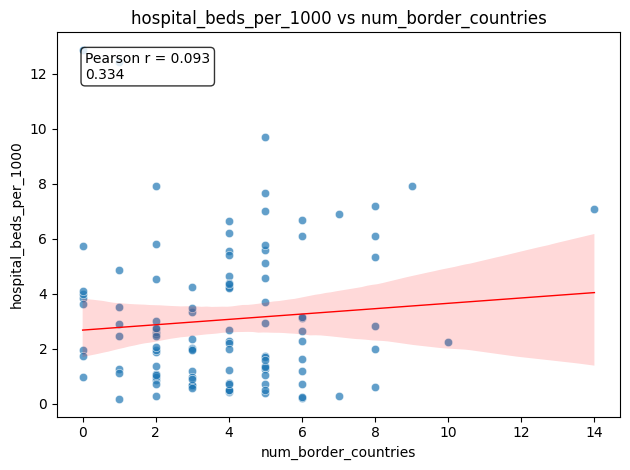

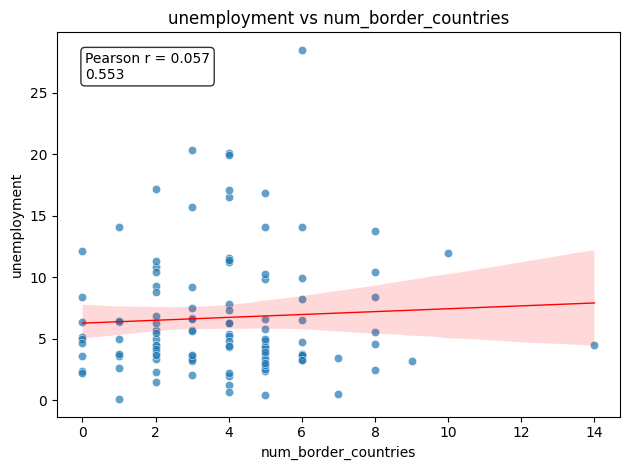

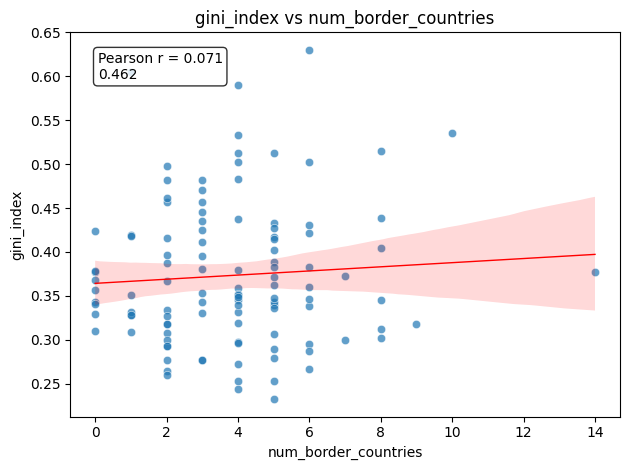

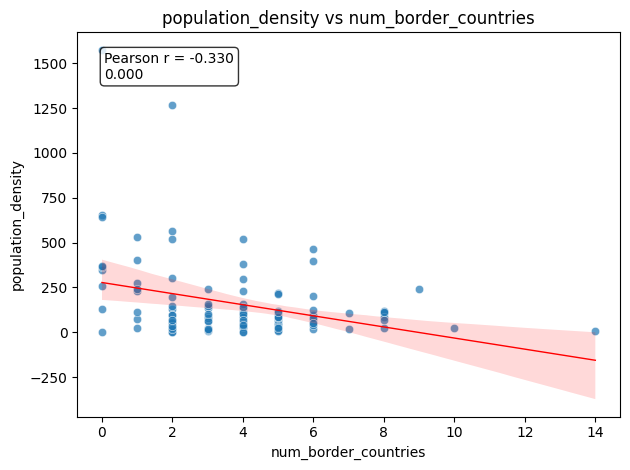

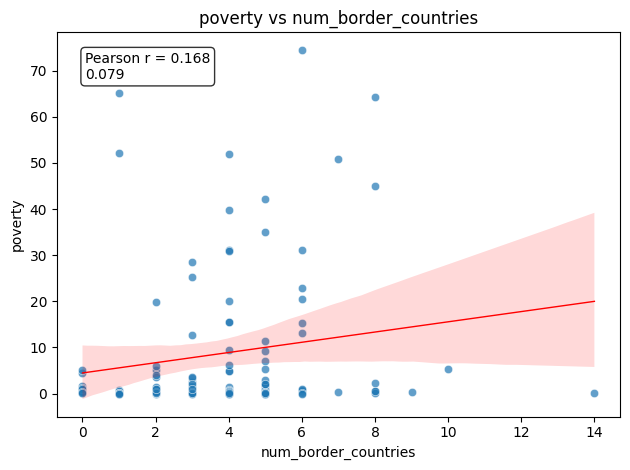

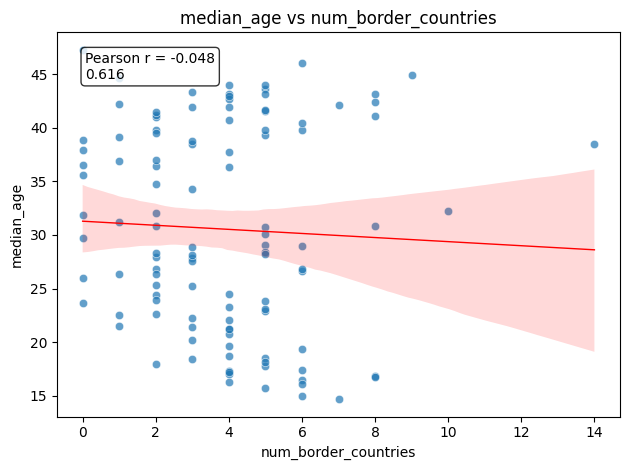

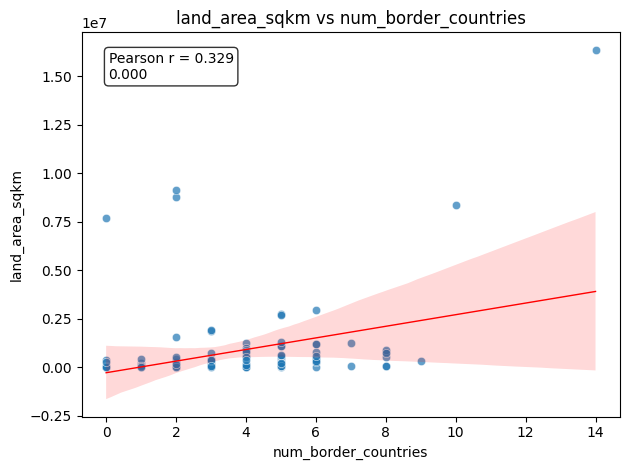

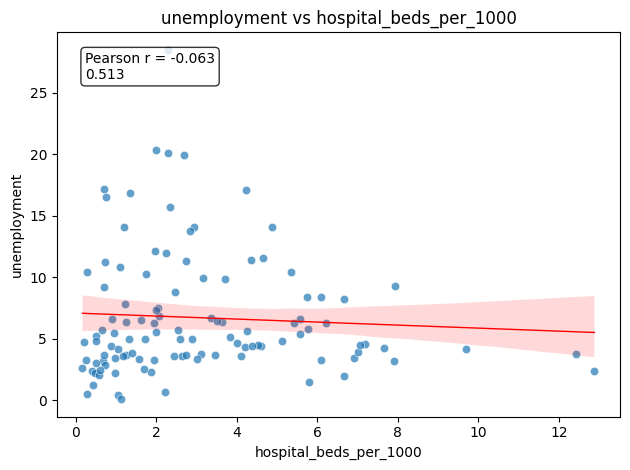

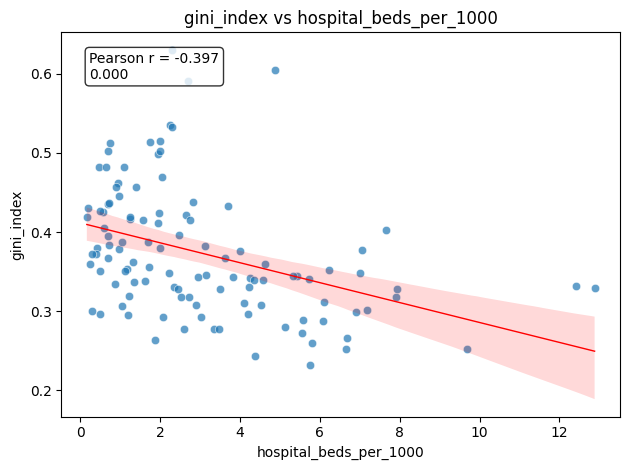

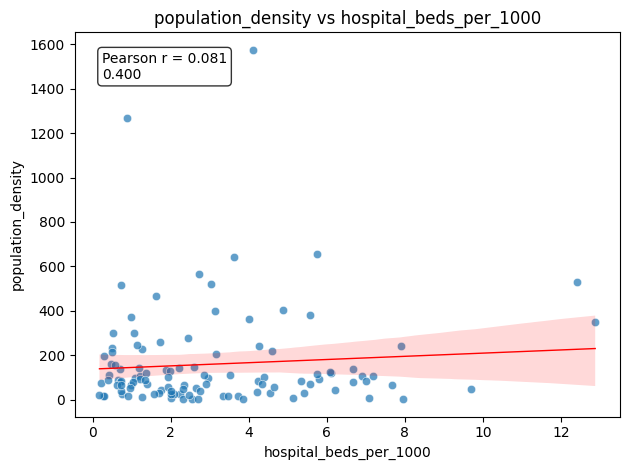

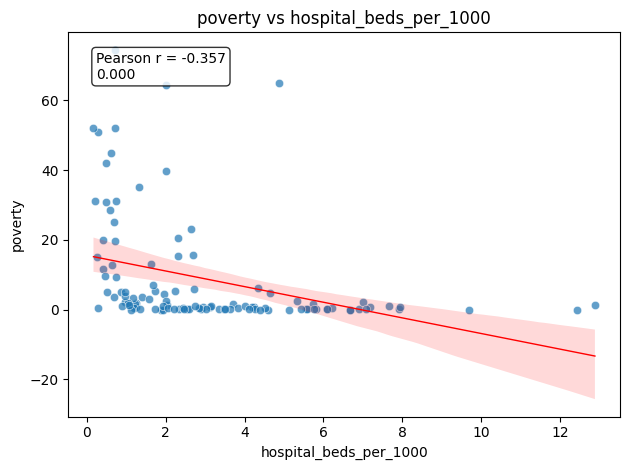

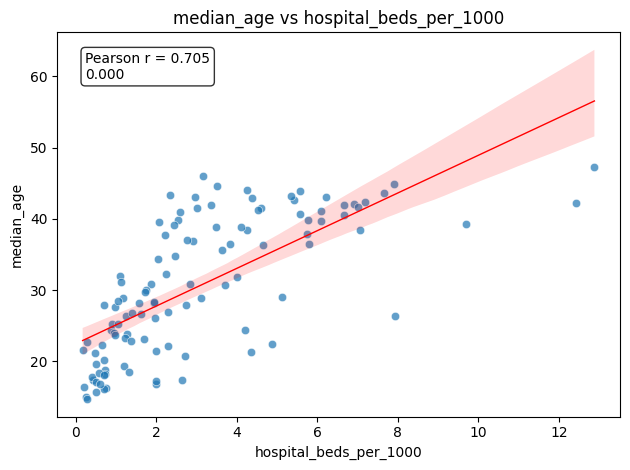

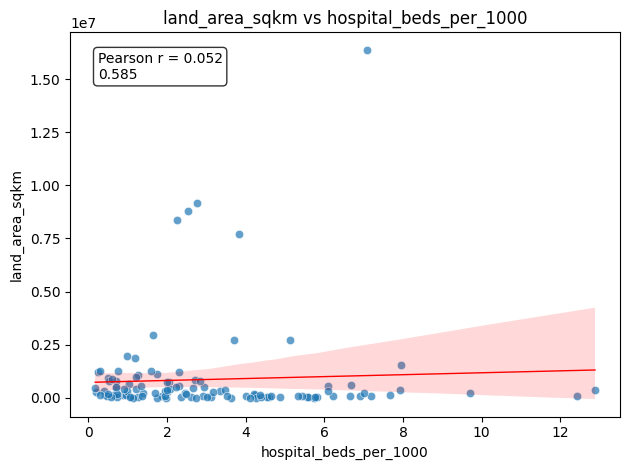

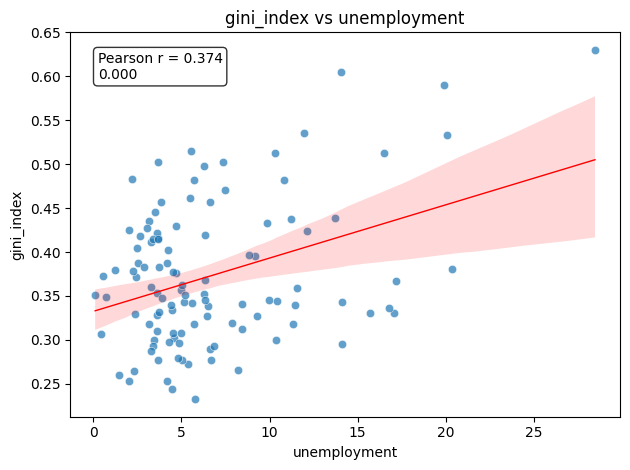

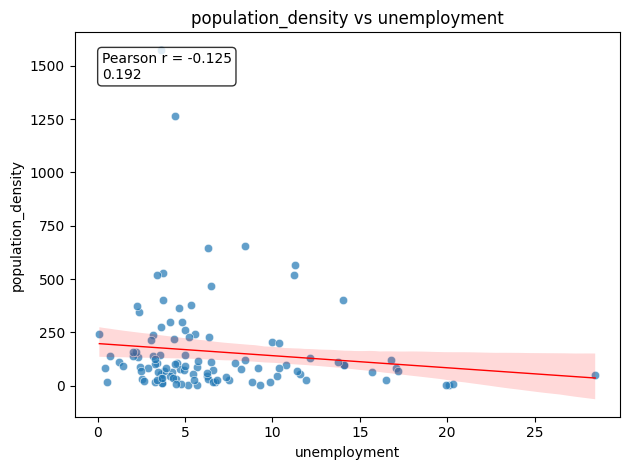

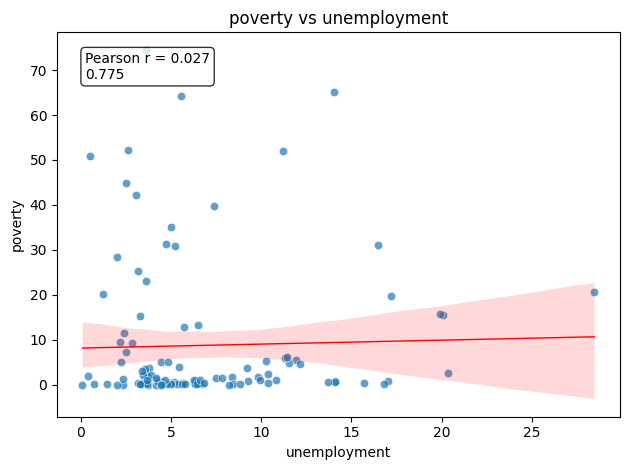

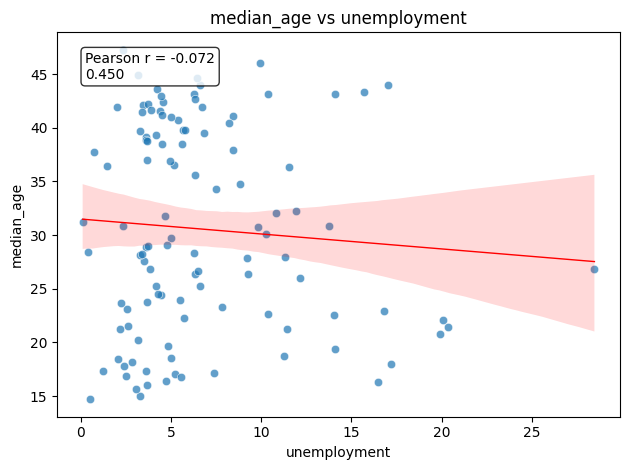

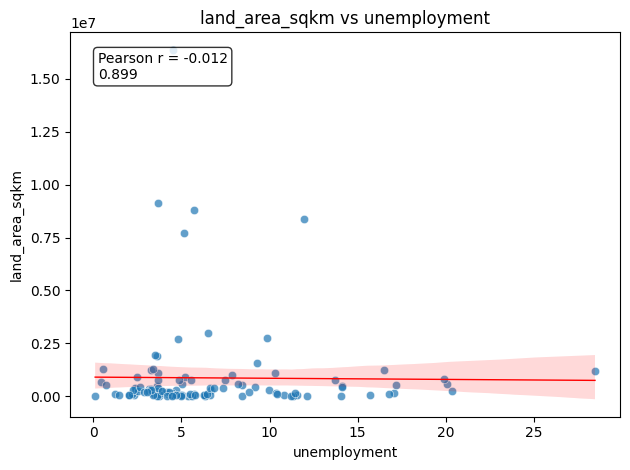

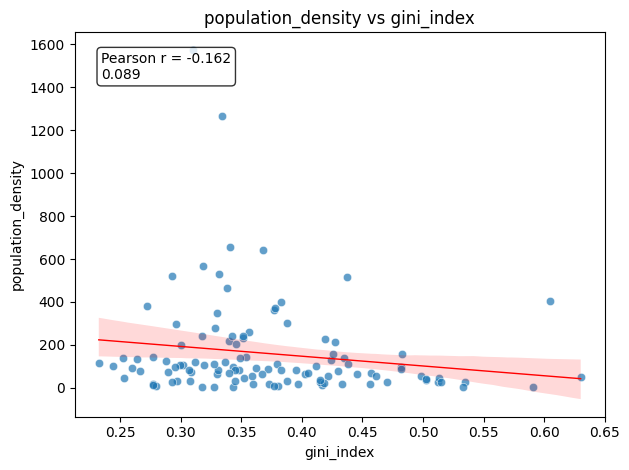

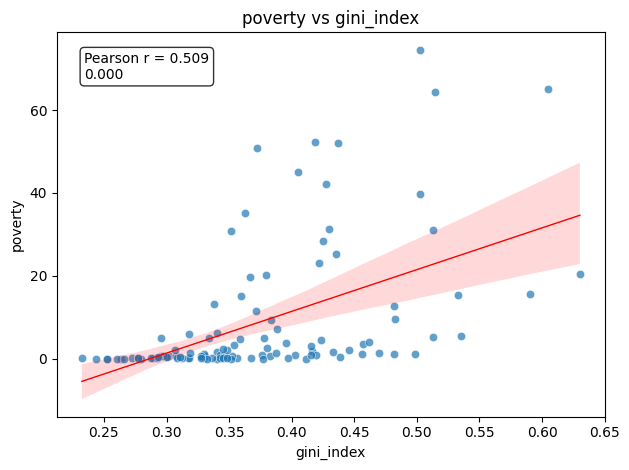

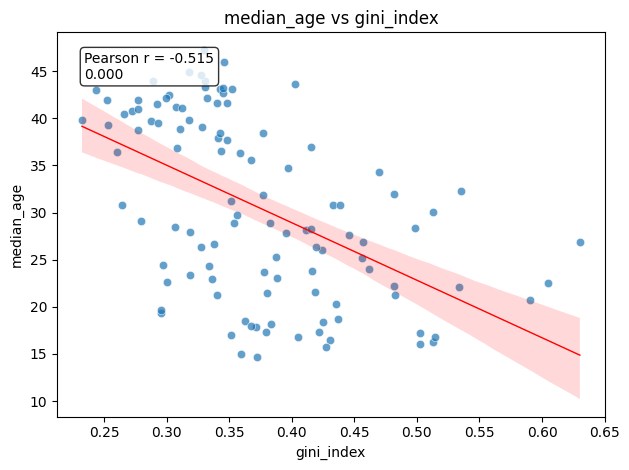

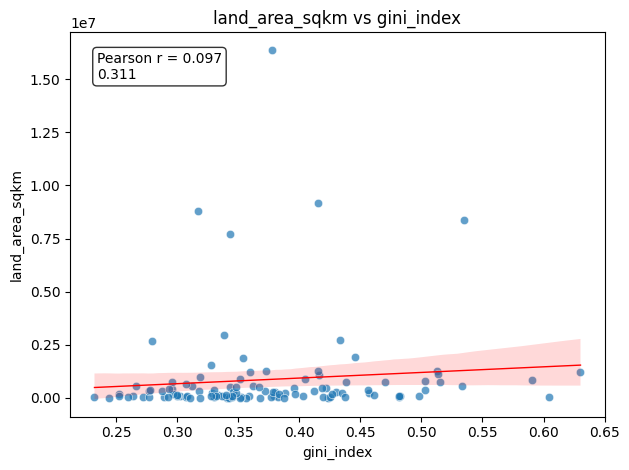

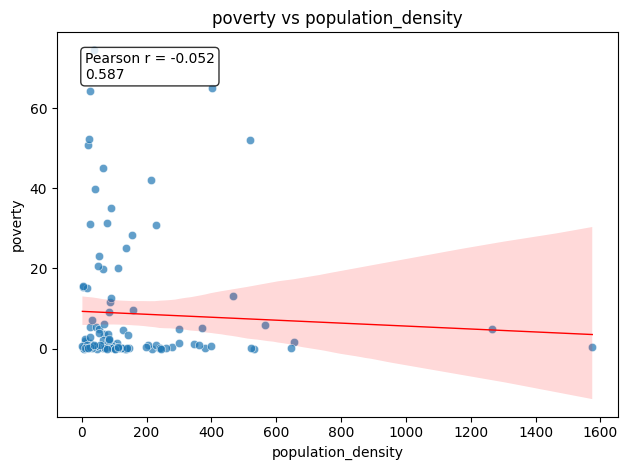

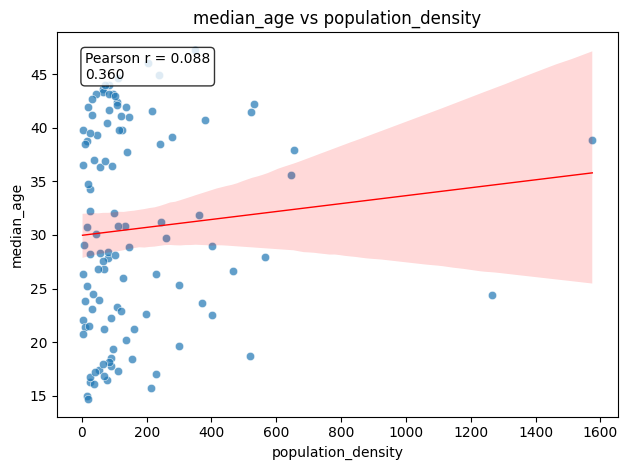

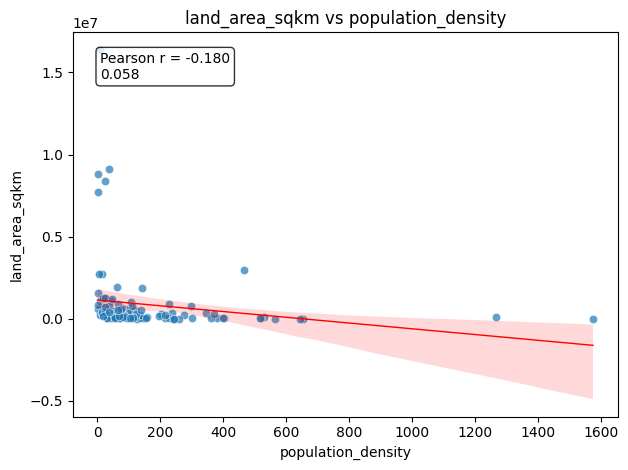

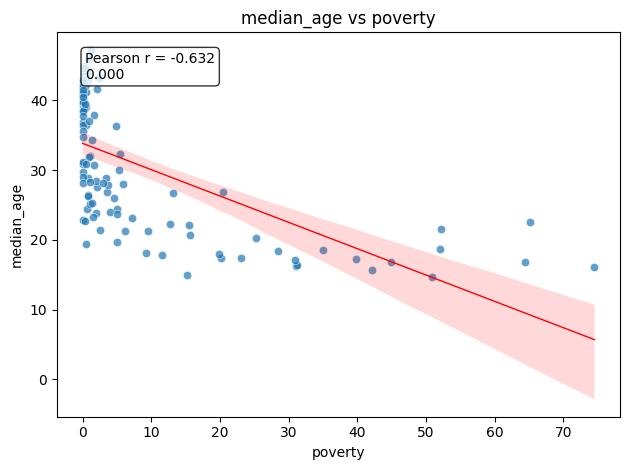

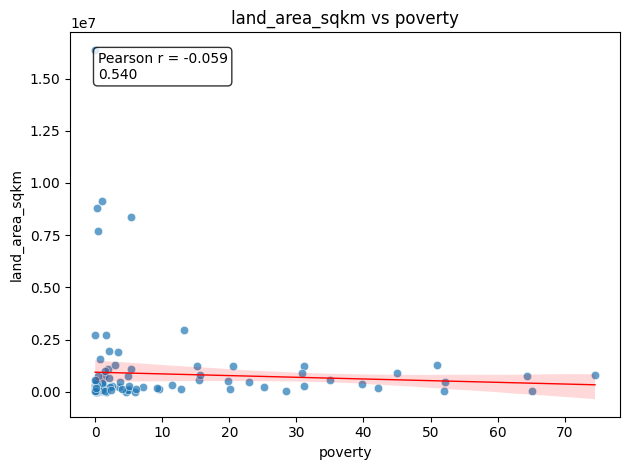

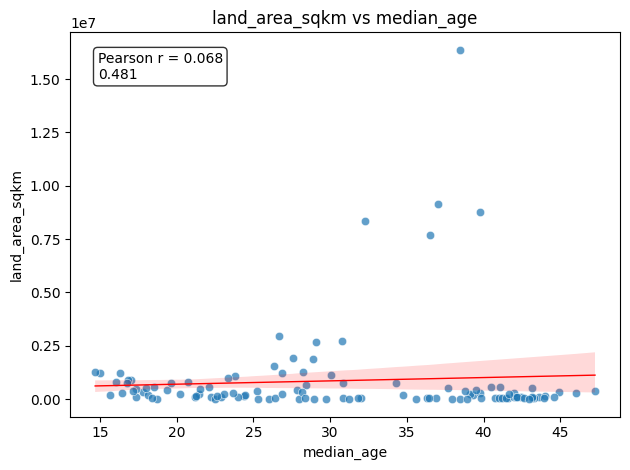

In [41]:
y_variables = country_stat_numeric_var.copy()
for x_var in country_stat_numeric_var:
    y_variables.remove(x_var)
    for y_var in y_variables:
        create_bivariate_graph(country_stat, x_var, y_var)